##### **Objective:**

The project aims to analyze the Walmart retail dataset to uncover valuable insights by segmenting customers based on spending patterns, purchase frequency, and RFM metrics, enabling enhanced targeted marketing strategies, improved customer loyalty, and increased revenue for business growth.

##### **Dataset Columns:**


- **city:** 	Location of the customer.


- **customer_age:** 	Age of customers.


- **customer_name:** 	Name of the customer.


- **customer_segment:** 	Classification of customers into segments. 
- **discount:** 	Discount applied to products in the order.


- **order_date:** 	Date when the order was placed.


- **order_id:** 	Unique identifier for each order.


- **order_priority:** 	Priority level of the order.


- **order_quantity:** 	Quantity of items ordered.


- **product_base_margin:** 	Base profit margin for each product.


- **product_category:** 	Category of the product.


- **product_container:** 	Type of container for the product.


- **product_name:** 	Name of the purchased product.


- **product_sub_category:** 	Categorization within the main product category.


- **profit:** 	Total profit generated from the order.


- **region:** 	Geographic region where the sale occurred.


- **sales:** 	Total sales amount for each order.


- **ship_date:** 	Date when the order was shipped.


- **ship_mode:** 	Method of shipping used for the order.


- **shipping_cost:** 	Cost incurred for shipping the order.


- **state:** 	State in which the customer is located.


- **unit_price:** 		Price per unit of product.




- **zip_code:** 	Postal code for the customer's location.



In [140]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [141]:
# Load the dataset
retail_data = pd.read_csv('Walmart-Retail-Dataset.csv', on_bad_lines='skip', low_memory=False)

In [142]:
# Check the first rows of the data
retail_data.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,2020-03-02,Delivery Truck,3.772509354070991,Wisconsin,3.29,54481
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,2020-03-07,Delivery Truck,816.3408935057945,Wisconsin,258.98,54481
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,6129.06,2021-11-15,Delivery Truck,4530.505983276593,Texas,145.98,76051
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.9,2020-08-08,Regular Air,128.73150520457037,Arizona,6.68,85281
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,2021-08-13,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,Storage & Organization,24750.49210,South,1875.28,2021-08-18,Express Air,33.60838488294798,Florida,42.76,33063


In [143]:
# Display shape of retail data
retail_data.shape

(1019587, 23)

In [144]:
# To get summary of the dataset
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019587 entries, 0 to 1019586
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   city                  1019580 non-null  object 
 1   customer_age          1019587 non-null  object 
 2   customer_name         1019573 non-null  object 
 3   customer_segment      1017048 non-null  object 
 4   discount              1019587 non-null  object 
 5   order_date            1019587 non-null  object 
 6   order_id              1019587 non-null  object 
 7   order_priority        1017475 non-null  object 
 8   order_quantity        1019587 non-null  object 
 9   product_base_margin   1019587 non-null  object 
 10  product_category      1019587 non-null  object 
 11  product_container     1014853 non-null  object 
 12  product_name          1014842 non-null  object 
 13  product_sub_category  1014853 non-null  object 
 14  profit                1014853 non-

In [145]:
# Check for duplicates in the dataset
duplicates = retail_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


***Data Cleaning and Preprocessing***

In [146]:
# Check for missing values in the dataset
missing_values = retail_data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
city                       7
customer_age               0
customer_name             14
customer_segment        2539
discount                   0
order_date                 0
order_id                   0
order_priority          2112
order_quantity             0
product_base_margin        0
product_category           0
product_container       4734
product_name            4745
product_sub_category    4734
profit                  4734
region                  4734
sales                   4734
ship_date               4734
ship_mode               8157
shipping_cost           4734
state                   4734
unit_price              4734
zip_code                4734
dtype: int64


In [147]:
# Drop the 'zip_code' column as s it doesn't add significant value to the analysis
retail_data = retail_data.drop('zip_code', axis=1)

city

In [148]:
# Display the count of unique cities
city_value_counts = retail_data['city'].value_counts().reset_index()
city_value_counts.columns = ['City', 'Count']
print(city_value_counts)

                                                   City  Count
0                                                 Pearl    804
1                                              Westland    804
2                                                 Mason    803
3                                              Missoula    800
4                                            Park Ridge    799
...                                                 ...    ...
6150  Macon,39,Sarah Foster,Home Office,0.18,2019-11...      1
6151  Titusville,88,Chad McGuire,Consumer,0.1,2019-0...      1
6152  Louisville,88,Fred Wasserman,Consumer,0.14,201...      1
6153  Troy,82,Nora Pelletier,Small Business,0.21,201...      1
6154  East Cleveland,43,Theresa Coyne,Corporate,0.18...      1

[6155 rows x 2 columns]


In [149]:
# Check for missing values in the 'city' column
print(f"Number of missing values in 'city': {retail_data['city'].isnull().sum()}")

Number of missing values in 'city': 7


In [150]:
# Drop rows with missing 'city' values 
retail_data.dropna(subset=['city'], inplace=True)

# Verify there are no missing values in 'city' after dropping
print(f"Missing values in 'city' after dropping: {retail_data['city'].isna().sum()}")

Missing values in 'city' after dropping: 0


In [151]:
# Check for rows where 'city' contains only alphabetic characters and spaces
invalid_city = retail_data[retail_data['city'].str.isalpha()]
print(f"Number of rows with invalid 'city' (non-alphabetical): {invalid_city.shape[0]}")

Number of rows with invalid 'city' (non-alphabetical): 698812


In [152]:
# Replace missing values in the 'city' column with an empty string 
retail_data.loc[:, 'city'] = retail_data['city'].fillna('')

# Keep rows with alphabetic city names 
retail_data = retail_data[retail_data['city'].str.isalpha()]

In [153]:
# Check the count of unique cities 
unique_cities = retail_data['city'].nunique()
print(f"Number of unique cities: {unique_cities}")

# Display the top 10 cities with highest counts
city_counts = retail_data['city'].value_counts()
print(f"City counts:\n{city_counts.head(10)}")  

Number of unique cities: 979
City counts:
city
Westland    804
Pearl       804
Mason       803
Missoula    800
Meriden     794
Scranton    791
Atlanta     790
Gillette    790
Hillside    787
Killeen     782
Name: count, dtype: int64


customer_age

In [154]:
# Convert 'customer_age' to numeric
retail_data['customer_age'] = pd.to_numeric(retail_data['customer_age'], errors='coerce')

In [155]:
# Get the count of unique values in customer_age
unique_count = retail_data['customer_age'].nunique()

# Display the result
print(f"Number of unique customer ages: {unique_count}")

Number of unique customer ages: 71


In [156]:
# Get value counts of each age
value_counts = retail_data['customer_age'].value_counts()
print("Value Counts:\n", value_counts)

Value Counts:
 customer_age
79    10163
43    10149
27    10145
87    10141
82    10127
      ...  
33     9787
39     9787
56     9764
20     5037
90     4976
Name: count, Length: 71, dtype: int64


customer_name

In [157]:
# Check for missing values in 'customer_name' 
missing_customer_name = retail_data['customer_name'].isnull().sum()
print(f"Number of missing values in 'customer_name': {missing_customer_name}")

Number of missing values in 'customer_name': 10


In [158]:
# Display the unique customer names and their counts
print(retail_data['customer_name'].value_counts())

customer_name
Laurel Beltran       990
John Huston          985
Andy Gerbode         981
Jonathan Doherty     980
Thea Hendricks       972
                    ... 
Mark Van Huff        818
Deirdre Greer        818
Maureen Gastineau    805
Maribeth Dona        802
Pamela Coakley       798
Name: count, Length: 784, dtype: int64


In [159]:
# Drop rows with missing 'customer_name' 
retail_data.dropna(subset=['customer_name'], inplace=True)

# Verify that there are no missing values in 'customer_name' after dropping
missing_customer_name = retail_data['customer_name'].isna().sum()
print(f"Missing values in 'customer_name' after cleaning: {missing_customer_name}")

Missing values in 'customer_name' after cleaning: 0


In [160]:
# Check for numeric customer names 
numeric_customer_names = retail_data[retail_data['customer_name'].str.isnumeric()]
print(f"Number of rows with numeric 'customer_name': {numeric_customer_names.shape[0]}")

Number of rows with numeric 'customer_name': 0


In [161]:
# Identify invalid customer names (non-alphabetic and non-space)
invalid_customer_name = retail_data[~retail_data['customer_name'].str.replace(r'[^a-zA-Z\s]', '', regex=True).eq(retail_data['customer_name'])]
print(f"Number of rows with invalid 'customer_name': {invalid_customer_name.shape[0]}")

Number of rows with invalid 'customer_name': 0


In [162]:
# Remove non-alphabetic and non-space characters from the customer_name column
retail_data['customer_name'] = retail_data['customer_name'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [163]:
# Check for invalid customer names again after cleaning
invalid_customer_name_after_cleaning = retail_data[~retail_data['customer_name'].str.replace(r'[^a-zA-Z\s]', '', regex=True).eq(retail_data['customer_name'])]
print(f"Number of rows with invalid 'customer_name' : {invalid_customer_name_after_cleaning.shape[0]}")

Number of rows with invalid 'customer_name' : 0


In [164]:
# Check for empty customer names 
empty_customer_name = retail_data[retail_data['customer_name'] == '']
print(f"Number of rows with empty 'customer_name': {empty_customer_name.shape[0]}")

Number of rows with empty 'customer_name': 0


In [165]:
# Remove any rows where 'customer_name' is still empty or contains only spaces
retail_data = retail_data[retail_data['customer_name'].str.strip() != '']

In [166]:
print(retail_data['customer_name'].value_counts())

customer_name
Laurel Beltran       990
John Huston          985
Andy Gerbode         981
Jonathan Doherty     980
Thea Hendricks       972
                    ... 
Mark Van Huff        818
Deirdre Greer        818
Maureen Gastineau    805
Maribeth Dona        802
Pamela Coakley       798
Name: count, Length: 784, dtype: int64


In [167]:
# Convert 'customer_name' to lowercase 
retail_data['customer_name'] = retail_data['customer_name'].str.lower()

# Check for duplicate values in the 'customer_name' column
print(retail_data['customer_name'].value_counts())

customer_name
laurel beltran       990
john huston          985
andy gerbode         981
jonathan doherty     980
thea hendricks       972
                    ... 
mark van huff        818
deirdre greer        818
maureen gastineau    805
maribeth dona        802
pamela coakley       798
Name: count, Length: 784, dtype: int64


In [168]:
# Check for customer names that are too short (length < 2 characters)
short_customer_names = retail_data[retail_data['customer_name'].str.len() < 2]
print(f"Number of short 'customer_name': {short_customer_names.shape[0]}")

# Check for customer names that are too long (length > 50 characters)
long_customer_names = retail_data[retail_data['customer_name'].str.len() > 50]
print(f"Number of long 'customer_name': {long_customer_names.shape[0]}")

Number of short 'customer_name': 0
Number of long 'customer_name': 0


In [169]:
# Check for numeric customer names 
numeric_customer_names = retail_data[retail_data['customer_name'].str.isnumeric()]
print(f"Number of rows with numeric 'customer_name': {numeric_customer_names.shape[0]}")

Number of rows with numeric 'customer_name': 0


In [170]:
# Check unique customer names
print("Unique customer names:")
print(retail_data['customer_name'].unique())

Unique customer names:
['anthony garverick' 'anne mcfarland' 'cyra reiten' 'christine kargatis'
 'scott williamson' 'dennis pardue' 'dionis lloyd' 'jill matthias'
 'mark haberlin' 'jennifer halladay' 'art ferguson' 'brenda bowman'
 'daniel byrd' 'sandra glassco' 'fred chung' 'aleksandra gannaway'
 'kelly lampkin' 'sue ann reed' 'barry weirich' 'phillina ober'
 'thea hudgings' 'max jones' 'vivek gonzalez' 'christine sundaresam'
 'susan vittorini' 'ross baird' 'ben peterman' 'john dryer'
 'michael kennedy' 'grant carroll' 'jessica myrick' 'phillip breyer'
 'saphhira shifley' 'sara luxemburg' 'charles sheldon' 'ed braxton'
 'steven ward' 'tonja turnell' 'harold dahlen' 'tim taslimi' 'trudy brown'
 'muhammed macintyre' 'frank price' 'sylvia foulston' 'carol triggs'
 'maria zettner' 'luke weiss' 'christy brittain' 'rob lucas' 'kean nguyen'
 'roger demir' 'carol adams' 'jack garza' 'maxwell schwartz'
 'cathy prescott' 'deanra eno' 'neil ducich' 'steven roelle' 'ann steele'
 'sean christensen

customer_segment

In [171]:
# Check for missing values in 'customer_segment'
missing_customer_segment = retail_data['customer_segment'].isnull().sum()
print(f"Number of missing values in 'customer_segment': {missing_customer_segment}")

Number of missing values in 'customer_segment': 1736


In [172]:
# Drop rows with missing 'customer_segment'
retail_data = retail_data.dropna(subset=['customer_segment'])

# Verify the missing values in 'customer_segment' after dropping
missing_customer_segment = retail_data['customer_segment'].isnull().sum()
print(f"Number of missing values in 'customer_segment' after dropping: {missing_customer_segment}")

Number of missing values in 'customer_segment' after dropping: 0


In [173]:
# Display unique values in 'customer_segment' column
unique_customer_segment = retail_data['customer_segment'].unique()
print(f"Unique values in 'customer_segment': {unique_customer_segment}")

Unique values in 'customer_segment': ['Small Business' 'Consumer' 'Home Office' 'Corporate']


In [174]:
# Count the number of customers in each segment
segment_counts = retail_data['customer_segment'].value_counts()
print(f"Customer segment distribution:\n{segment_counts}")

Customer segment distribution:
customer_segment
Home Office       174821
Corporate         174714
Small Business    174543
Consumer          172988
Name: count, dtype: int64


discount

In [175]:
# Check for null values in the 'discount' column
null_discount = retail_data['discount'].isnull().sum()
print(f"Number of missing values in 'discount' column: {null_discount}")

Number of missing values in 'discount' column: 0


In [176]:
# Convert 'discount' column to numeric
retail_data['discount'] = pd.to_numeric(retail_data['discount'], errors='coerce')

# Check unique discount rates
unique_discount_values = retail_data['discount'].unique()
print(f"Unique discount rates applied: {unique_discount_values}")
print(f"Number of unique discount rates: {len(unique_discount_values)}")

Unique discount rates applied: [0.05 0.09 0.04 0.25 0.13 0.15 0.03 0.23 0.2  0.06 0.1  0.14 0.11 0.21
 0.24 0.08 0.17 0.   0.12 0.01 0.19 0.07 0.02 0.16 0.18 0.22]
Number of unique discount rates: 26


In [177]:
# Check the value counts for 'discount'
discount_counts = retail_data['discount'].value_counts()
print("Discount value counts:")
print(discount_counts)

Discount value counts:
discount
0.05    28164
0.17    28152
0.04    28124
0.16    28123
0.07    28095
0.11    28092
0.06    28084
0.09    28078
0.15    27952
0.08    27897
0.14    27893
0.24    27887
0.10    27874
0.12    27871
0.19    27834
0.02    27800
0.23    27795
0.21    27765
0.03    27731
0.01    27672
0.18    27667
0.22    27658
0.13    27590
0.20    27583
0.25    13992
0.00    13693
Name: count, dtype: int64


In [178]:
# Check for unrealistic discount values (negative discounts or discounts > 1 or 100%)
unrealistic_discounts = retail_data[(retail_data['discount'] < 0) | (retail_data['discount'] > 1)]
print(f"Number of unrealistic discount values: {unrealistic_discounts.shape[0]}")

Number of unrealistic discount values: 0


order_date

In [179]:
# Convert the 'order_date' column to datetime format
retail_data['order_date'] = pd.to_datetime(retail_data['order_date'])

In [180]:
# Check for null values in the 'order_date' column
order_date_nulls = retail_data['order_date'].isnull().sum()
print(f"Number of null values in 'order_date': {order_date_nulls}")

Number of null values in 'order_date': 0


In [181]:
# Check if any order date is in the future beyond today's date
future_order_dates = retail_data[retail_data['order_date'] > pd.Timestamp.today()]
print(f"Number of future order dates: {future_order_dates.shape[0]}")

Number of future order dates: 0


In [182]:
print(retail_data['order_date'].head(10))

2    2021-11-11
3    2020-08-02
6    2020-12-18
7    2021-07-24
8    2019-01-11
9    2022-12-13
10   2019-02-08
11   2019-10-18
13   2021-09-09
16   2019-03-15
Name: order_date, dtype: datetime64[ns]


order_priority

In [183]:
# Check for missing values in the 'order_priority' column
missing_order_priority = retail_data['order_priority'].isna().sum()
print(f"Number of missing values in 'order_priority': {missing_order_priority}")

Number of missing values in 'order_priority': 1439


In [184]:
# Drop rows with missing 'order_priority' values
retail_data.dropna(subset=['order_priority'], inplace=True)

# Check the number of missing values in 'order_priority' after dropping
order_priority_missing = retail_data['order_priority'].isna().sum()
print(f"Number of missing values in 'order_priority' after dropping: {order_priority_missing}")

Number of missing values in 'order_priority' after dropping: 0


In [185]:
# Check unique values in the 'order_priority' column
unique_order_priority = retail_data['order_priority'].unique()
print(f"Unique values in 'order_priority': {unique_order_priority}")

Unique values in 'order_priority': ['Medium' 'Not Specified' 'Low' 'Critical' 'High']


In [186]:
# Check value counts of 'order_priority' column
order_priority_counts = retail_data['order_priority'].value_counts()
print(f"Value counts of 'order_priority' :\n{order_priority_counts}")

Value counts of 'order_priority' :
order_priority
High             139811
Critical         139619
Not Specified    139417
Low              139240
Medium           137540
Name: count, dtype: int64


order_quantity

In [187]:
# Convert 'order_quantity' to numeric
retail_data['order_quantity'] = pd.to_numeric(retail_data['order_quantity'], errors='coerce')

In [188]:
#  Check for missing values in 'order_quantity' column
missing_order_quantity = retail_data['order_quantity'].isna().sum()
print(f"Missing values in 'order_quantity': {missing_order_quantity}")

Missing values in 'order_quantity': 0


In [189]:
# Check if any rows have 'order_quantity' <= 0
invalid_order_quantity = retail_data[retail_data['order_quantity'] <= 0]

if not invalid_order_quantity.empty:
    print("There are rows with order_quantity <= 0.")
else:
    print("No rows with order_quantity <= 0.")


No rows with order_quantity <= 0.


In [190]:
print(retail_data[['order_quantity']].head())

   order_quantity
2              42
3              30
6              29
7              16
8              16


product_base_margin

In [191]:
# Convert 'product_base_margin' to numeric
retail_data['product_base_margin'] = pd.to_numeric(retail_data['product_base_margin'], errors='coerce')

In [192]:
# Check for null values in the column after conversion
missing_product_base_margin = retail_data['product_base_margin'].isna().sum()
print(f"Missing values in 'product_base_margin' after conversion: {missing_product_base_margin}")

Missing values in 'product_base_margin' after conversion: 8069


In [193]:
# Impute missing values in 'product_base_margin' using the median 
retail_data['product_base_margin'] = retail_data['product_base_margin'].fillna(retail_data['product_base_margin'].median())

# Check if there are any missing values left after imputation
missing_product_base_margin = retail_data['product_base_margin'].isna().sum()
print(f"Missing values in 'product_base_margin' after imputation: {missing_product_base_margin}")

Missing values in 'product_base_margin' after imputation: 0


In [194]:
# Check for values outside the expected range for 'product_base_margin'
invalid_range = retail_data[(retail_data['product_base_margin'] < 0) | 
                            (retail_data['product_base_margin'] > 1)]

if invalid_range.empty:
    print("No invalid 'product_base_margin' values outside the expected range (0 to 1).")
else:
    print(f"Invalid 'product_base_margin' values found:\n{invalid_range}")

No invalid 'product_base_margin' values outside the expected range (0 to 1).


product_category

In [195]:
# Check for missing values in 'product_category'
missing_product_category = retail_data['product_category'].isna().sum()
print(f"Missing values in 'product_category': {missing_product_category}")

Missing values in 'product_category': 0


In [196]:
# Check unique values in 'product_category' 
unique_categories = retail_data['product_category'].unique()
print(f"Unique product_category values: {unique_categories}")

Unique product_category values: ['Furniture' 'Office Supplies' 'Technology' '\\N']


In [197]:
# Replace '\\N'  with NaN
retail_data['product_category'] = retail_data['product_category'].replace('\\N', pd.NA)

In [198]:
# Count occurrences of each unique value in 'product_category'
category_counts = retail_data['product_category'].value_counts()

# Display the count of each category
print(category_counts)

product_category
Office Supplies    370278
Technology         164283
Furniture          158341
Name: count, dtype: int64


product_container

In [199]:
# Check for missing values in 'product_container' column
missing_product_container = retail_data['product_container'].isna().sum()
print(f"Missing values in 'product_container': {missing_product_container}")

Missing values in 'product_container': 0


In [200]:
# Check unique values in 'product_container' column
unique_product_container = retail_data['product_container'].unique()
print(f"Unique product_container values: {unique_product_container}")

Unique product_container values: ['Jumbo Box' 'Small Box' 'Wrap Bag' 'Small Pack' 'Large Box' 'Medium Box'
 'Jumbo Drum' '\\N']


In [201]:
# Replace '\\N'  with NaN in 'product_container'
retail_data['product_container'] = retail_data['product_container'].replace('\\N', pd.NA)

In [202]:
# Count occurrences of each unique value in 'product_container'
product_container_counts = retail_data['product_container'].value_counts()
print(f"Product container counts:\n{product_container_counts}")

Product container counts:
product_container
Small Box     357897
Wrap Bag       96584
Small Pack     68296
Jumbo Drum     52408
Jumbo Box      46633
Large Box      39290
Medium Box     31794
Name: count, dtype: int64


product_name

In [203]:
# Check for missing values in the 'product_name' column
missing_product_name = retail_data['product_name'].isna().sum()
print(f"Missing values in 'product_name': {missing_product_name}")

Missing values in 'product_name': 7


In [204]:
# Check for unique product names
unique_product_names = retail_data['product_name'].nunique()
print(f"Number of unique product names: {unique_product_names}")

Number of unique product names: 1232


product_sub_category

In [205]:
# Check for missing values in the 'product_sub_category' column
missing_product_sub_category = retail_data['product_sub_category'].isna().sum()
print(f"Missing values in 'product_sub_category': {missing_product_sub_category}")

Missing values in 'product_sub_category': 0


In [206]:
unique_sub_categories = retail_data['product_sub_category'].unique()
print(f"Unique product_sub_category values after handling NaN: {unique_sub_categories}")

Unique product_sub_category values after handling NaN: ['Tables' 'Paper' 'Pens & Art Supplies' 'Bookcases' 'Office Furnishings'
 'Telephones and Communication' 'Computer Peripherals' 'Labels'
 'Appliances' 'Chairs & Chairmats' 'Binders and Binder Accessories'
 'Rubber Bands' 'Office Machines' 'Copiers and Fax'
 'Storage & Organization' 'Envelopes' '\\N']


In [207]:
# Replace '\\N' with NaN in 'product_sub_category'
retail_data['product_sub_category'] = retail_data['product_sub_category'].replace('\\N', pd.NA)

In [208]:
# Display unique values and their counts for 'product_sub_category'
product_sub_category_counts = retail_data['product_sub_category'].value_counts()
print(product_sub_category_counts)

product_sub_category
Paper                             103899
Office Furnishings                 78652
Binders and Binder Accessories     71671
Telephones and Communication       68641
Computer Peripherals               57974
Pens & Art Supplies                54940
Storage & Organization             46792
Appliances                         38231
Tables                             31252
Chairs & Chairmats                 30941
Office Machines                    30725
Labels                             21722
Bookcases                          17496
Envelopes                          16774
Rubber Bands                       16249
Copiers and Fax                     6943
Name: count, dtype: int64


profit

In [209]:
# Check for missing values in 'profit' column
missing_profit = retail_data['profit'].isna().sum()

# Display the result
print(f"Missing values in 'profit': {missing_profit}")

Missing values in 'profit': 0


region

In [210]:
# Check for null values in the 'region' column
null_region_values = retail_data['region'].isnull().sum()
print(f"Null values in 'region': {null_region_values}")

Null values in 'region': 0


In [211]:
# Display unique values in 'region' column after removing '40.2'
unique_regions = retail_data['region'].unique()
print(f"Unique values in 'region': {unique_regions}")

Unique values in 'region': ['Central' 'West' 'South' 'East' '40.2']


In [212]:
# Remove rows where the 'region' column has the value '40.2'
retail_data = retail_data[retail_data['region'] != '40.2']

In [213]:
# Display value counts for 'region' column, including missing values
region_counts = retail_data['region'].value_counts(dropna=False)
print(region_counts)

region
East       248907
Central    190529
South      128868
West       126674
Name: count, dtype: int64


sales

In [214]:
# Convert 'sales' column to numeric
retail_data['sales'] = pd.to_numeric(retail_data['sales'], errors='coerce')

In [215]:
# Check for the number of missing values in the 'sales' column
missing_sales = retail_data['sales'].isna().sum()
print(f"Missing values in 'sales': {missing_sales}")

Missing values in 'sales': 2724


In [216]:
# Drop rows with missing 'sales'
retail_data = retail_data.dropna(subset=['sales'])

missing_sales = retail_data['sales'].isna().sum()
print(f"Missing values in 'sales' after dropping rows: {missing_sales}")

Missing values in 'sales' after dropping rows: 0


In [217]:
# Check for negative sales values
negative_sales = retail_data[retail_data['sales'] < 0]
print(f"Number of rows with negative sales values: {negative_sales.shape[0]}")

# Check for rows with zero sales
zero_sales = retail_data[retail_data['sales'] == 0]
print(f"Number of rows with zero sales: {zero_sales.shape[0]}")

Number of rows with negative sales values: 0
Number of rows with zero sales: 0


ship_date

In [218]:
# Convert 'ship_date' to datetime
retail_data['ship_date'] = pd.to_datetime(retail_data['ship_date'], errors='coerce')

In [219]:
# Check for the number of missing values in the 'ship_date' column
missing_ship_date = retail_data['ship_date'].isna().sum()
print(f"Missing values in 'ship_date': {missing_ship_date}")

Missing values in 'ship_date': 0


ship_mode

In [220]:
# Check for missing values in 'ship_mode'
missing_ship_mode = retail_data['ship_mode'].isnull().sum()
print(f"Missing values in 'ship_mode': {missing_ship_mode}")

Missing values in 'ship_mode': 2280


In [221]:
# Drop rows with missing 'ship_mode'
retail_data = retail_data.dropna(subset=['ship_mode'])
print(f"Missing values in 'ship_mode' after dropping: {retail_data['ship_mode'].isna().sum()}")

Missing values in 'ship_mode' after dropping: 0


In [222]:
# Display unique values in 'ship_mode'
unique_ship_modes = retail_data['ship_mode'].unique()
print(f"Unique values in 'ship_mode': {unique_ship_modes}")

Unique values in 'ship_mode': ['Delivery Truck' 'Regular Air' 'Express Air']


In [223]:
# Check value counts for 'ship_mode'
print(retail_data['ship_mode'].value_counts())

ship_mode
Express Air       231118
Regular Air       230201
Delivery Truck    228655
Name: count, dtype: int64


shipping_cost

In [224]:
# Convert 'shipping_cost' to numeric
retail_data['shipping_cost'] = pd.to_numeric(retail_data['shipping_cost'], errors='coerce')

# Check for missing values introduced
print(f"Missing values in 'shipping_cost' after conversion: {retail_data['shipping_cost'].isna().sum()}")

Missing values in 'shipping_cost' after conversion: 0


In [225]:
# Check for invalid values (negative values, zero values)
invalid_shipping_costs = retail_data[retail_data['shipping_cost'] <= 0]
print(f"Invalid 'shipping_cost' values (<= 0): {invalid_shipping_costs.shape[0]}")

Invalid 'shipping_cost' values (<= 0): 0


In [226]:
# Identify non-numeric values in 'shipping_cost'
non_numeric_shipping_costs = retail_data[~retail_data['shipping_cost'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_shipping_costs['shipping_cost'].unique())

[]


state

In [227]:
# Check for missing values in 'state'
missing_state = retail_data['state'].isna().sum()
print(f"Missing values in 'state': {missing_state}")

Missing values in 'state': 0


In [228]:
# Display value counts for 'state' 
print(retail_data['state'].value_counts())

state
MA                65859
Texas             50361
New Jersey        43638
California        35998
Ohio              32223
Illinois          29666
New York          25380
Washington        24140
Florida           23946
North Carolina    19066
Pennsylvania      18787
Virginia          18630
Michigan          18328
Connecticut       17654
Tennessee         15915
Minnesota         15550
Wisconsin         14869
Indiana           14846
Maryland          14538
Utah              12629
Oregon            12142
Georgia           10744
Colorado          10560
Arizona           10468
MO                10154
Alabama            9827
Kansas             9209
Oklahoma           9104
Arkansas           8575
Rhode Island       8482
Iowa               7839
Maine              6355
Mississippi        6284
West Virginia      5745
South Carolina     5745
New Hampshire      5597
Louisiana          5588
New Mexico         4972
Idaho              4846
Montana            4297
Nebraska           4204
North Dako

In [229]:
# Check for invalid values ( empty strings, or other unexpected values)
invalid_state_values = retail_data[retail_data['state'] == '']
print(f"Invalid empty strings in 'state': {len(invalid_state_values)}")

Invalid empty strings in 'state': 0


In [230]:
invalid_state_values = retail_data[retail_data['state'].isin(['-', '*', 'NULL'])]
print(f"Invalid state values with symbols: {len(invalid_state_values)}")

Invalid state values with symbols: 0


unit_price

In [231]:
retail_data['unit_price'] = pd.to_numeric(retail_data['unit_price'], errors='coerce')

missing_unit_price = retail_data['unit_price'].isna().sum()
print(f"Missing values in 'unit_price': {missing_unit_price}")

Missing values in 'unit_price': 0


In [232]:
# Check for negative or zero 'unit_price' values
invalid_unit_price = retail_data[retail_data['unit_price'] <= 0]

# Display the count of invalid 'unit_price' values
invalid_unit_price_count = invalid_unit_price.shape[0]
print(f"Invalid 'unit_price' values: {invalid_unit_price_count}")

Invalid 'unit_price' values: 0


In [233]:
# Verify missing values after cleaning
null_values = retail_data.isna().sum()
null_values

city                    0
customer_age            0
customer_name           0
customer_segment        0
discount                0
order_date              0
order_id                0
order_priority          0
order_quantity          0
product_base_margin     0
product_category        0
product_container       0
product_name            0
product_sub_category    0
profit                  0
region                  0
sales                   0
ship_date               0
ship_mode               0
shipping_cost           0
state                   0
unit_price              0
dtype: int64

In [234]:
# To verify the data types after conversion
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689974 entries, 2 to 1019586
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city                  689974 non-null  object        
 1   customer_age          689974 non-null  int64         
 2   customer_name         689974 non-null  object        
 3   customer_segment      689974 non-null  object        
 4   discount              689974 non-null  float64       
 5   order_date            689974 non-null  datetime64[ns]
 6   order_id              689974 non-null  object        
 7   order_priority        689974 non-null  object        
 8   order_quantity        689974 non-null  int64         
 9   product_base_margin   689974 non-null  float64       
 10  product_category      689974 non-null  object        
 11  product_container     689974 non-null  object        
 12  product_name          689974 non-null  object        
 13  pro

***univariate analysis***

outliers

In [235]:
# Identify the numerical columns
numerical_columns = retail_data.select_dtypes(include=['float64', 'int64']).columns

# Print numerical columns
print(f"Numerical columns: {numerical_columns}")

Numerical columns: Index(['customer_age', 'discount', 'order_quantity', 'product_base_margin',
       'profit', 'sales', 'shipping_cost', 'unit_price'],
      dtype='object')


In [236]:
# Calculate IQR for each numerical column
Q1 = retail_data[numerical_columns].quantile(0.25)
Q3 = retail_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: values below lower_bound or above upper_bound
outliers = (retail_data[numerical_columns] < lower_bound) | (retail_data[numerical_columns] > upper_bound)

# Count the number of outliers for each column
outliers_count = outliers.sum()
print(f"Outliers based on IQR method:\n{outliers_count}")

Outliers based on IQR method:
customer_age               0
discount                   0
order_quantity             0
product_base_margin        0
profit                     0
sales                  83426
shipping_cost          90432
unit_price             63894
dtype: int64


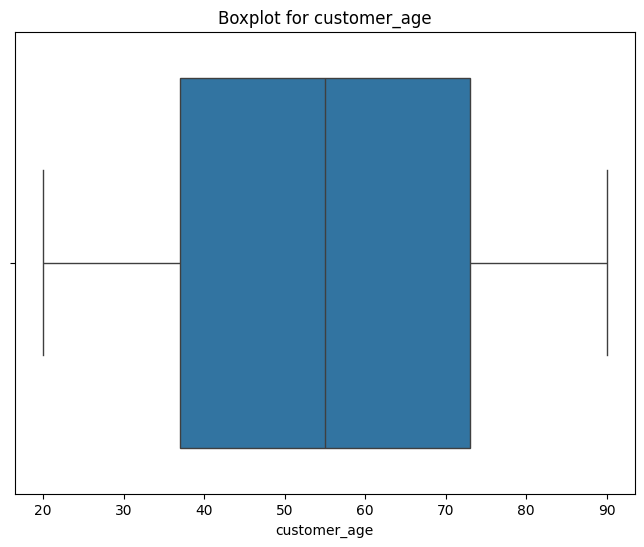

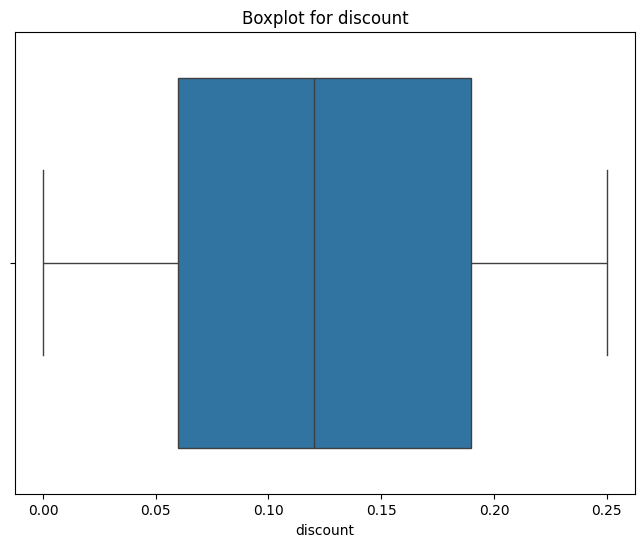

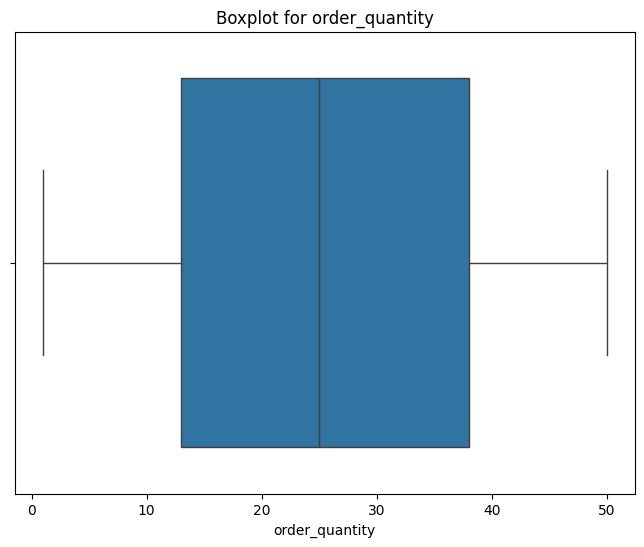

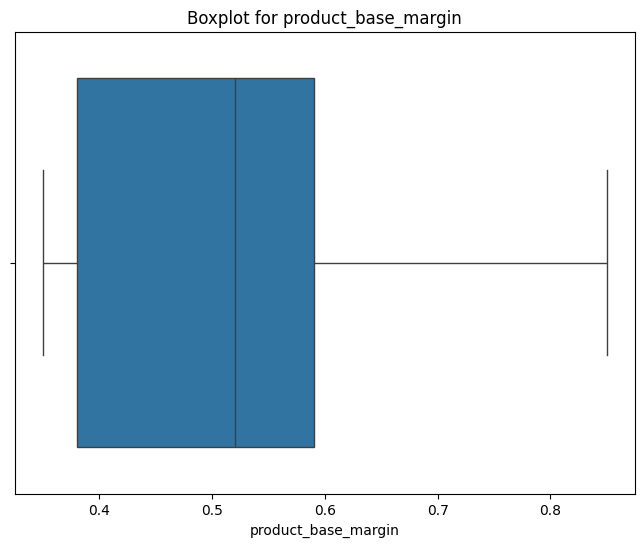

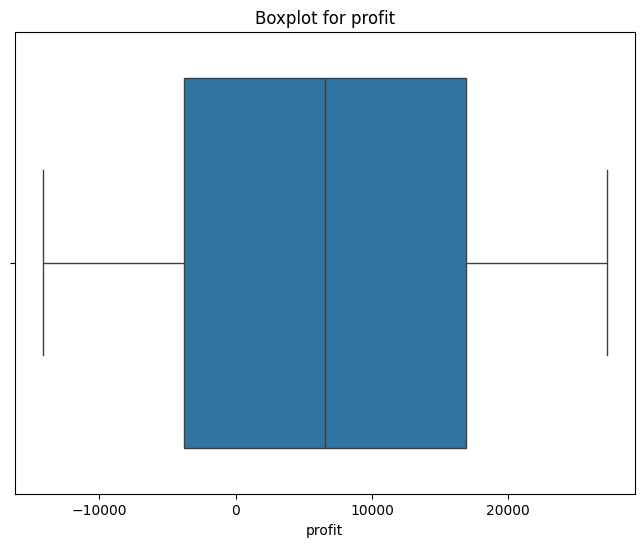

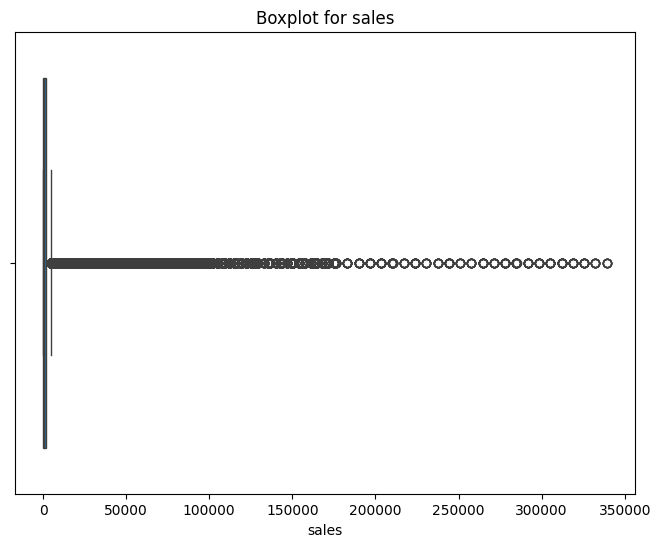

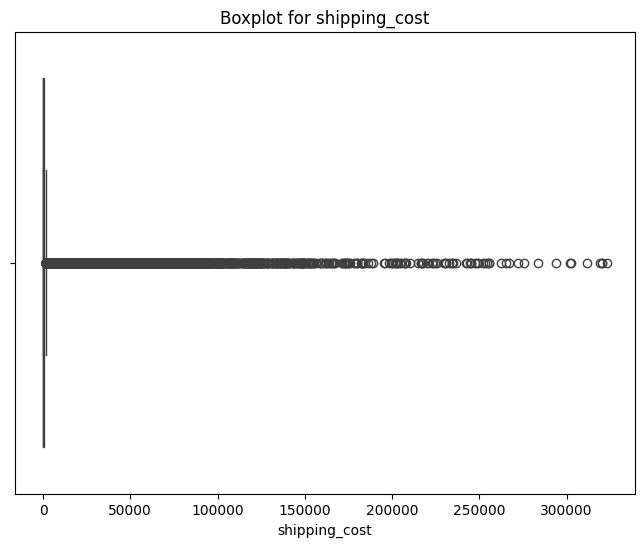

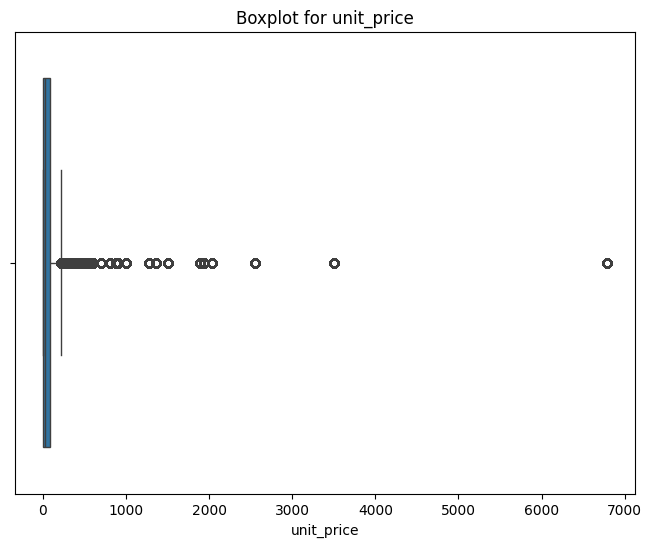

In [237]:
# Boxplot for each numerical column to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=retail_data, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

In the case of Walmart, the outliers in sales, shipping costs, and unit prices are expected and valid due to the following reasons:

- Sales: High-volume, bulk orders, especially in Technology and Office Supplies categories.<br>
- Shipping costs:Increased shipping costs due to bulk shipments, large items (like furniture), or expedited shipping methods.<br>
- Unit Price: Higher unit prices for Technology and Furniture products, driven by corporate purchases and high-priority orders. These factors, combined with regional demand, state-specific purchasing behavior, and order priorities, justify the outliers in Walmart's dataset.

In [238]:
# Describe summary of statistics of the selected numerical columns
retail_data[numerical_columns].describe()

,customer_age,discount,order_quantity,product_base_margin,profit,sales,shipping_cost,unit_price
count,689974.000000,689974.000000,689974.000000,689974.000000,689974.000000,689974.000000,689974.000000,689974.000000
mean,55.012280,0.124940,25.479383,0.512933,6567.477228,2328.309360,1167.043055,91.752101
std,20.233205,0.072193,14.149143,0.133258,11942.985248,8456.866586,4964.053926,289.752757
min,20.000000,0.000000,1.000000,0.350000,-14139.884710,0.760000,0.000054,0.990000
25%,37.000000,0.060000,13.000000,0.380000,-3773.555108,138.240000,49.367888,6.480000
50%,55.000000,0.120000,25.000000,0.520000,6584.279960,465.920000,184.498331,22.840000
75%,73.000000,0.190000,38.000000,0.590000,16910.822890,1913.420000,814.815273,89.990000
max,90.000000,0.250000,50.000000,0.850000,27219.989640,339147.500000,322963.460796,6783.020000


Unique Products in dataset

In [239]:
unique_products = retail_data['product_name'].nunique()
print(f"There are {unique_products} unique products in the dataset.")

There are 1227 unique products in the dataset.


Top 10 products sold by quantity


In [240]:
# Group by 'product_name' and calculate the total order_quantity for each product
top_10_products = retail_data.groupby('product_name')['order_quantity'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products
print(top_10_products)

product_name
Iceberg OfficeWorks 42 Round Tables                                           41118
Global Adaptabilities Conference Tables                                       40803
Bretford CR8500 Series Meeting Room Furniture                                 38766
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables             29700
Logitech Internet Navigator Keyboard                                          29268
Microsoft Internet Keyboard                                                   29178
Bush Mission Pointe Library                                                   29028
Deflect-o DuraMat Antistatic Studded Beveled Mat for Medium Pile Carpeting    28912
Telescoping Adjustable Floor Lamp                                             28858
Hon Metal Bookcases  Putty                                                    28848
Name: order_quantity, dtype: int64


Unique customers in the dataset

In [241]:
# Count the number of unique customers based on 'customer_name'
unique_customers = retail_data['customer_name'].nunique()

# Display the number of unique customers
print(f"There are {unique_customers} unique customers in the dataset.")

There are 784 unique customers in the dataset.


State with maximum number of unique customers

In [242]:
# Group by 'city' and count the unique 'customer_name' for each city
unique_customers_per_city = retail_data.groupby('city')['customer_name'].nunique()

# Identify the city with the maximum number of unique customers
max_customers_city = unique_customers_per_city.idxmax()
max_customers_count = unique_customers_per_city.max()

# Display the result
print(f"The city with the maximum number of unique customers is {max_customers_city} with {max_customers_count} unique customers.")

The city with the maximum number of unique customers is Westland with 501 unique customers.


Region with maximum number of unique customers

In [243]:
# Group by 'region' and count the unique 'customer_name' for each region
unique_customers_per_region = retail_data.groupby('region')['customer_name'].nunique()

# Identify the region with the maximum number of unique customers
max_customers_region = unique_customers_per_region.idxmax()
max_customers_count = unique_customers_per_region.max()

# Display the result
print(f"The region with the maximum number of unique customers is {max_customers_region} with {max_customers_count} unique customers.")

The region with the maximum number of unique customers is Central with 784 unique customers.


***Univariate Analysis***

Customer Distribution by Age group

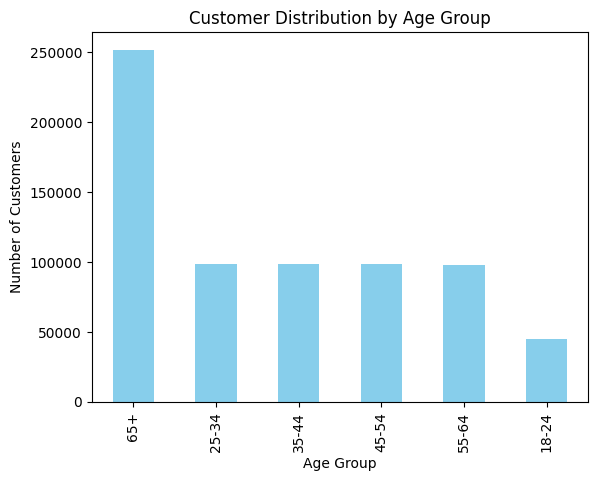

In [244]:
# Segment customers by age groups
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

retail_data['age_group'] = pd.cut(retail_data['customer_age'], bins=age_bins, labels=age_labels)

# Age group distribution
age_group_count = retail_data['age_group'].value_counts()

# Plotting the age group distribution
age_group_count.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

Insights<br>

65+ (Seniors): The largest group, indicating a growing market for products focused on health and leisure due to retirement and fixed incomes.<br>
18-24 (Gen Z): The smallest group, likely due to limited spending power as many are students or early career, with a focus on affordability and tech.<br>
25-34 (Millennials), 35-44 (Older Millennials & Gen X), 45-54 (Gen X), 55-64 (Baby Boomers): All have similar customer count, suggesting a balanced market. These groups represent a mix of high spending potential, family stability, health focus, and premium product interest.

Customer Segment Distribution

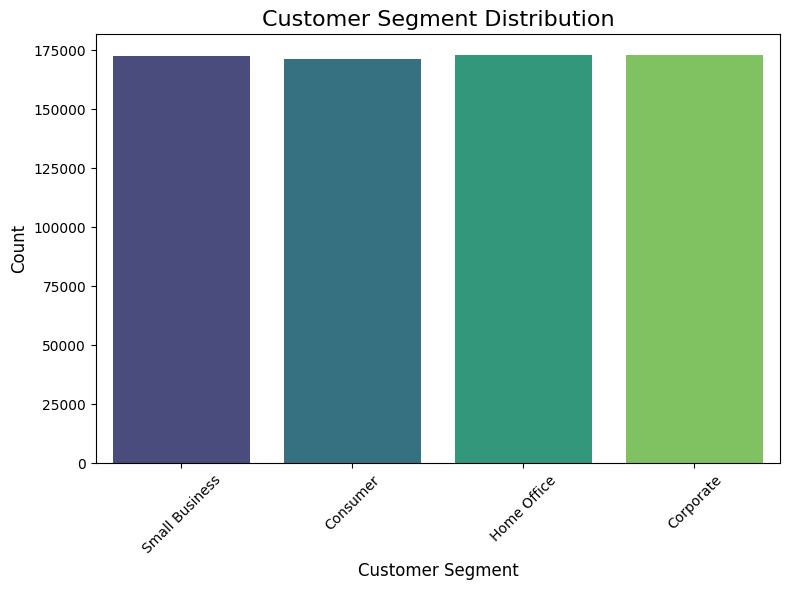

In [245]:
# Create a count plot for the 'customer_segment' column
plt.figure(figsize=(8, 6))
sns.countplot(data=retail_data, x='customer_segment', palette='viridis')
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

Insights:<br>
Uniform Distribution: The customer segments (Small Business, Consumer, Home Office, and Corporate) have relatively balanced counts, indicating Walmart's broad appeal across different customer types.<br>
Market Coverage: No single segment appears to dominate significantly. This implies that Walmart serves a diverse customer base effectively.

***Bivariate Analysis***

Total Sales per State

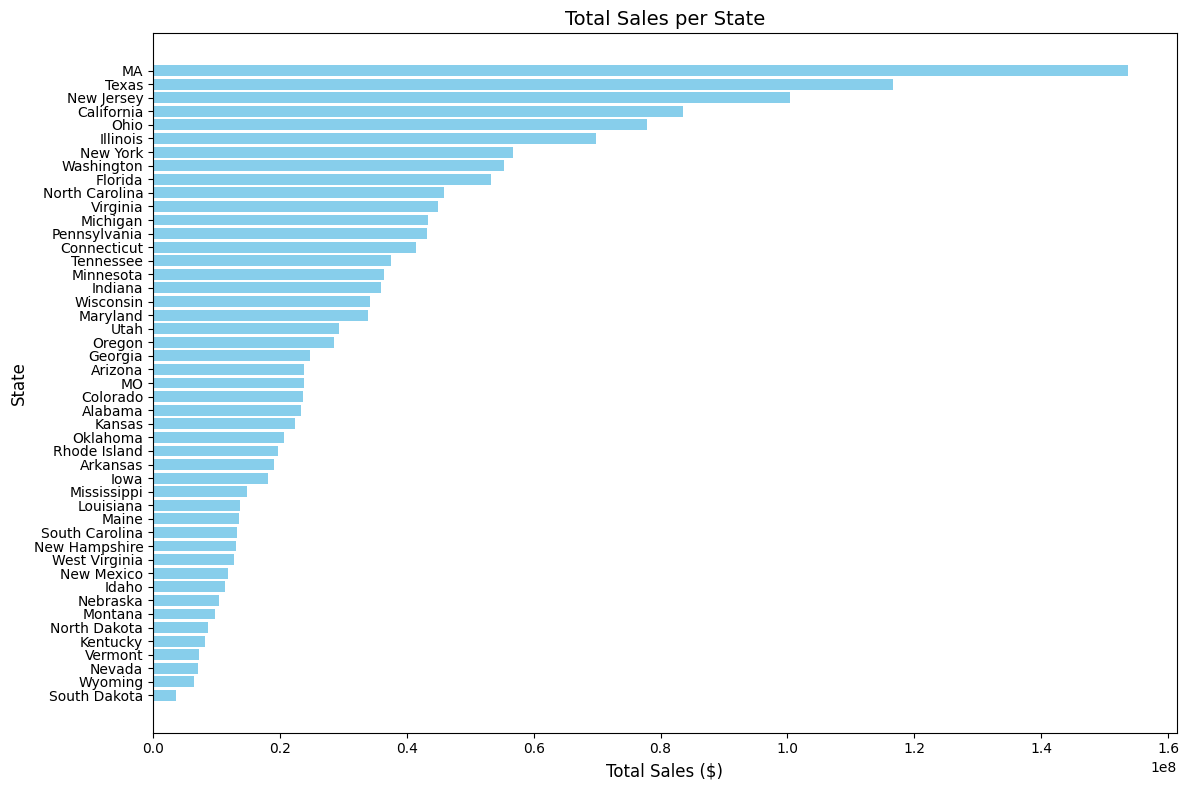

In [246]:
# Group data by state and sum the sales for each state
state_sales = retail_data.groupby('state')['sales'].sum()

# Sort the values in ascending order 
state_sales = state_sales.sort_values(ascending=True)

# Create a horizontal bar chart for Total Sales per State
plt.figure(figsize=(12, 8)) 
plt.barh(state_sales.index, state_sales.values, color='skyblue')  
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Total Sales per State', fontsize=14)
plt.yticks(fontsize=10, rotation=0)  
plt.tight_layout()  
plt.show()


Insight:<br>
Massachusetts (MA) has the highest total sales, followed by Texas and New Jersey, indicating strong market performance in these states.<br>
South Dakota has the lowest total sales, suggesting limited market activity or a smaller customer base.

Sales by Region

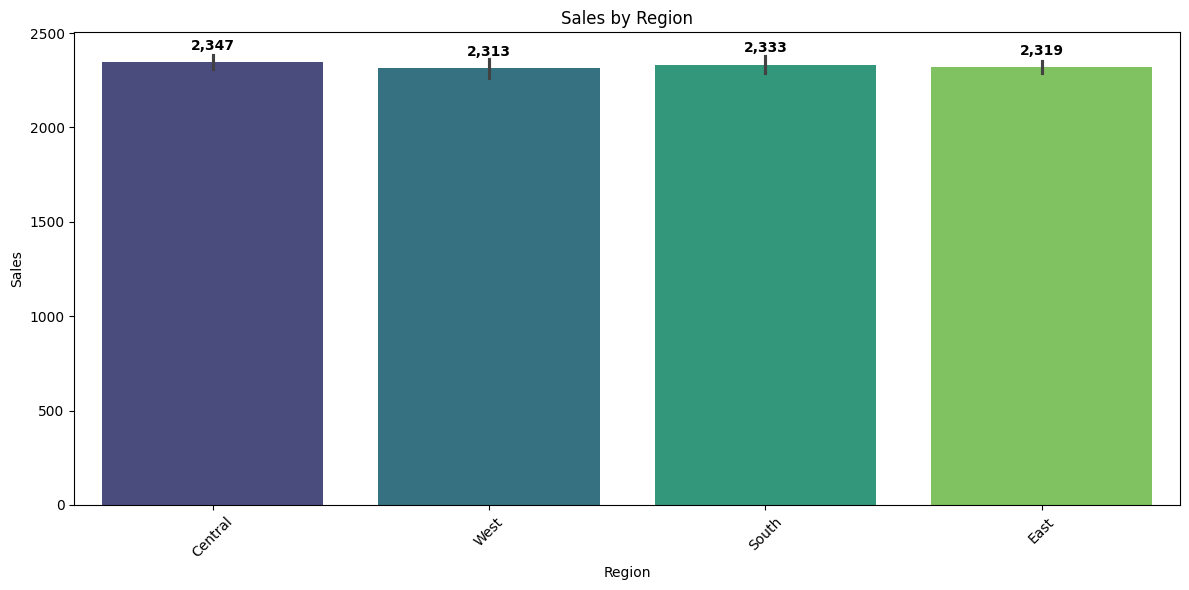

In [247]:
# Plot Sales by Region with sales values displayed on top of each bar
plt.figure(figsize=(12,6))
ax = sns.barplot(x='region', y='sales', data=retail_data, hue='region', palette='viridis')  # Using hue to differentiate regions

# Add sales values on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar (sales amount)
    ax.text(p.get_x() + p.get_width() / 2, height + 50,  # Position the text slightly above the bar
            f'{height:,.0f}',  # Format the sales value 
            ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


Insight:<br>

Sales Performance: Sales are nearly identical across the Central (2,347), South (2,333), East (2,319), and West (2,313) regions, with only minor variations.<br>
Regional Consistency: The minimal differences suggest consistent customer demand across regions, with no significant outliers, and implies uniform product appeal across regions.<br>

Sales by Product Category

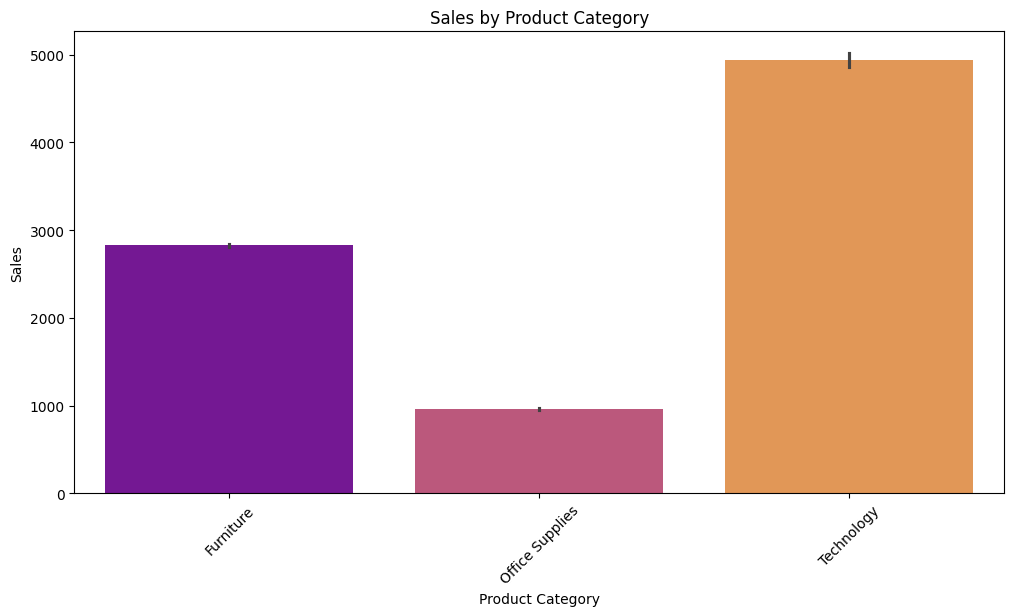

In [248]:
# Plot Sales by Product Category with hue to color by product category
plt.figure(figsize=(12,6))
sns.barplot(x='product_category', y='sales', data=retail_data, hue='product_category', palette='plasma')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


Insight:<br>

Technology dominates with the highest sales showing it is a top-performing category.<br>
Furniture follows with solid sales indicating strong but not dominant performance.<br>
Office Supplies has significantly lower sales suggesting it is underperforming compared to the other categories.<br>

Sales by Customer Segment

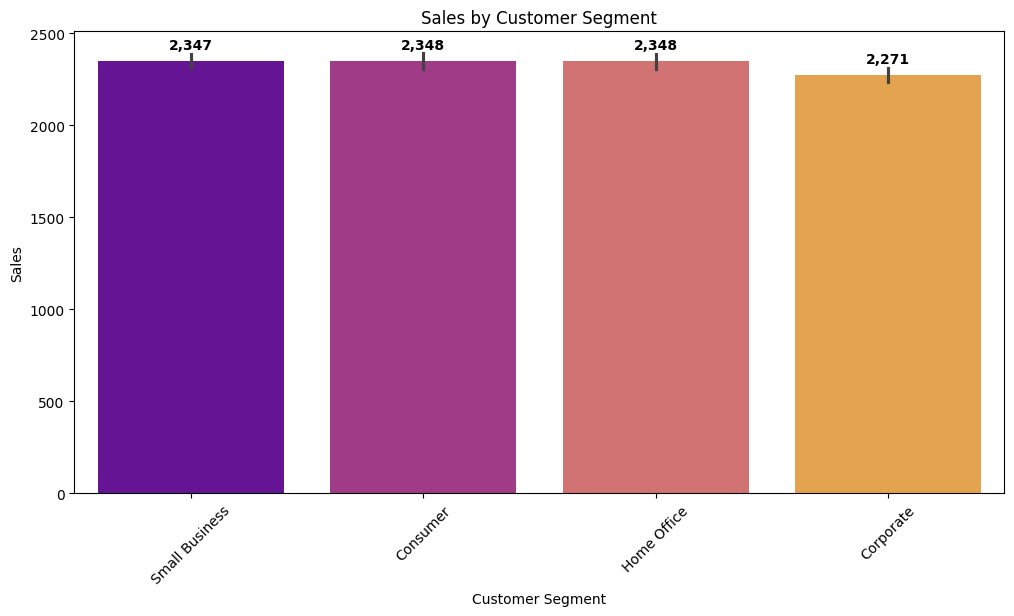

In [249]:
# Boxplot for Customer Segments by Sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_segment', y='sales', data=retail_data,hue='customer_segment', palette='plasma')
# Add sales values on top of each bar
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar (sales amount)
    ax.text(p.get_x() + p.get_width() / 2, height + 50,  # Position the text slightly above the bar
            f'{height:,.0f}',  # Format the sales value (with commas for thousands)
            ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Total Sales by Shipping Mode

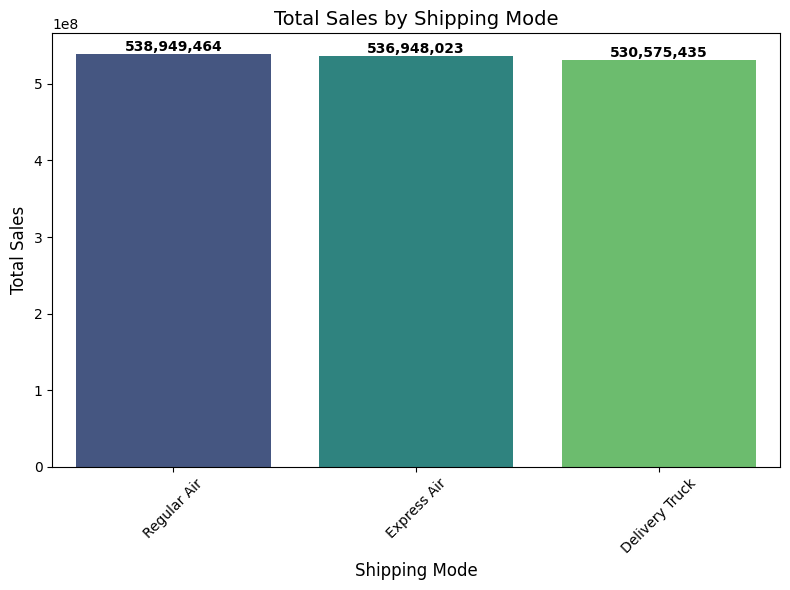

In [250]:
# Group by 'ship_mode' and calculate total sales
sales_by_ship_mode = retail_data.groupby('ship_mode')['sales'].sum().sort_values(ascending=False).reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=sales_by_ship_mode, x='ship_mode', y='sales', palette='viridis')

# Add sales values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50,  # Position the text
        f'{height:,.0f}',  # Format the sales value
        ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize the plot
plt.title('Total Sales by Shipping Mode', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:<br>

Total sales for all three shipping modes (Regular Air, Express Air, and Delivery Truck) are comparable, with only minor variations.<br>
Regular Air has the highest sales at 538,949,464, closely followed by Express Air (536,948,023) and Delivery Truck (530,575,435). The difference between the highest and lowest categories is minimal, suggesting all three shipping modes perform similarly in terms of sales contribution.

Profit by Product Category

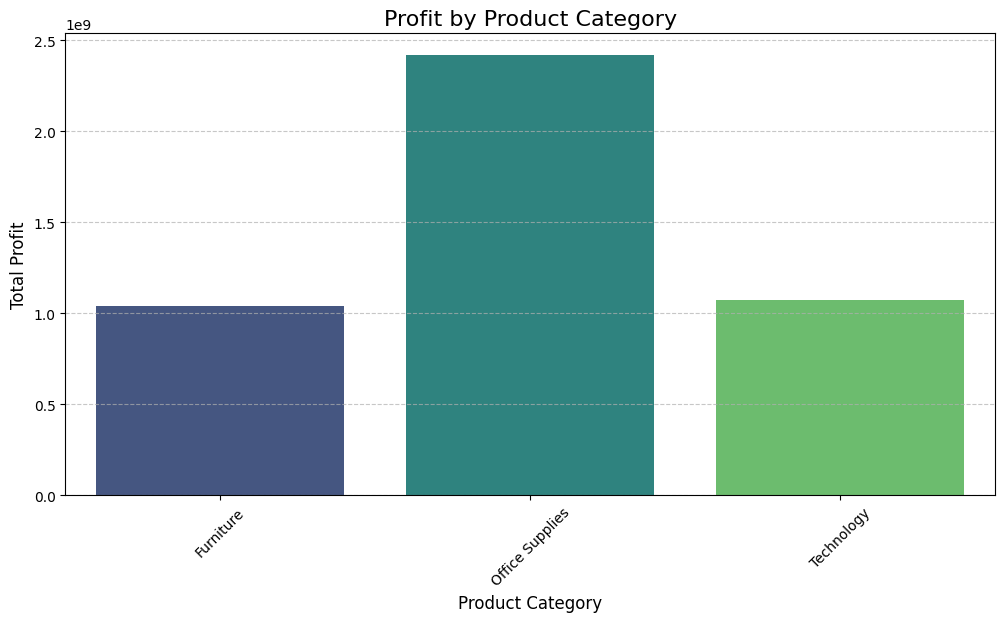

In [251]:
# Calculate total profit by product category
profit_by_category = retail_data.groupby('product_category')['profit'].sum().reset_index()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_category, x='product_category', y='profit', palette='viridis')
plt.title('Profit by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights:<br>

Office Supplies Lead: Office Supplies generate the highest profits.<br>
Furniture shows moderate profits.<br>
Technology has lower profits. 

Total Order Quantity by Customer Age Group

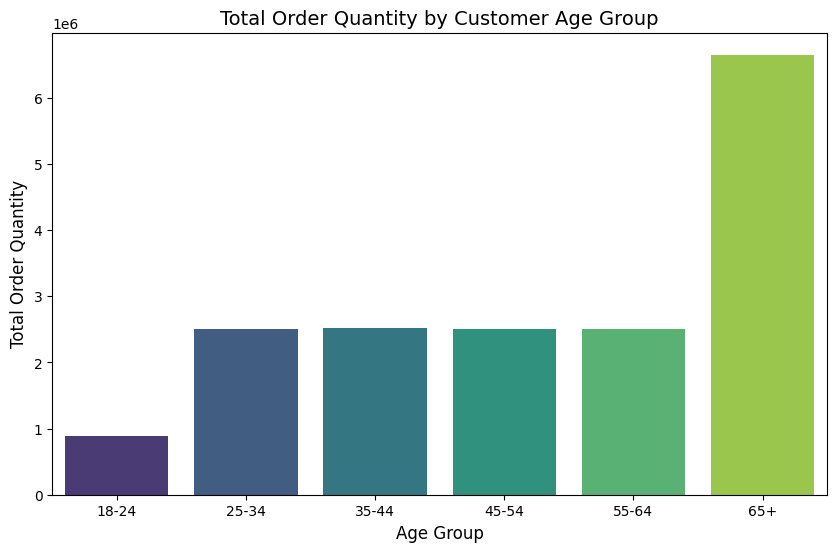

In [252]:
# Segment customers into age groups
age_bins = [18, 24, 34, 44, 54, 64, 100]  # Age ranges
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
retail_data['age_group'] = pd.cut(retail_data['customer_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate total order quantity for each age group
total_order_quantity = retail_data.groupby('age_group')['order_quantity'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=total_order_quantity.index, y=total_order_quantity.values, palette='viridis')
plt.title('Total Order Quantity by Customer Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Order Quantity', fontsize=12)
plt.show()

Total Sales and Total Orders by Age group

   customer_age age_group
2            49     45-54
3            30     25-34
6            38     35-44
7            25     25-34
8            43     35-44
  age_group   total_sales  total_orders
0     18-24  7.901308e+07         34582
1     25-34  2.273877e+08         98663
2     35-44  2.345948e+08         98605
3     45-54  2.278255e+08         98329
4     55-64  2.280925e+08         98119
5       65+  6.095594e+08        261676


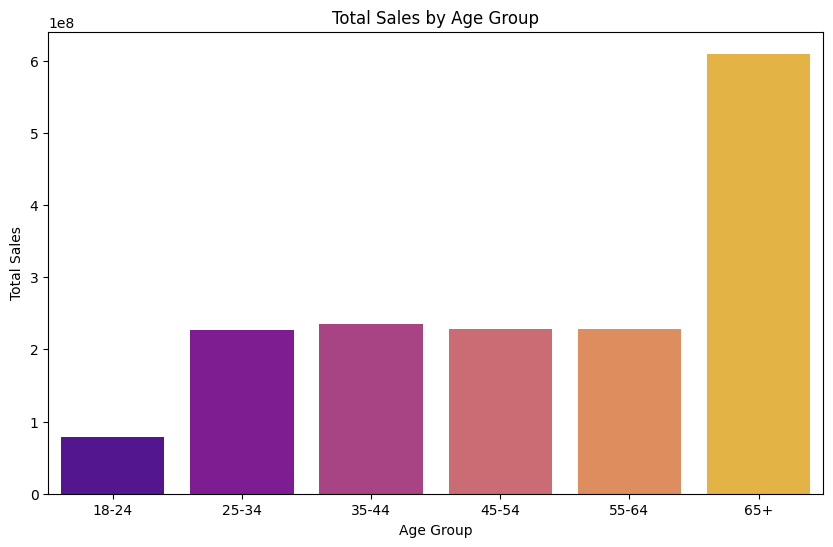

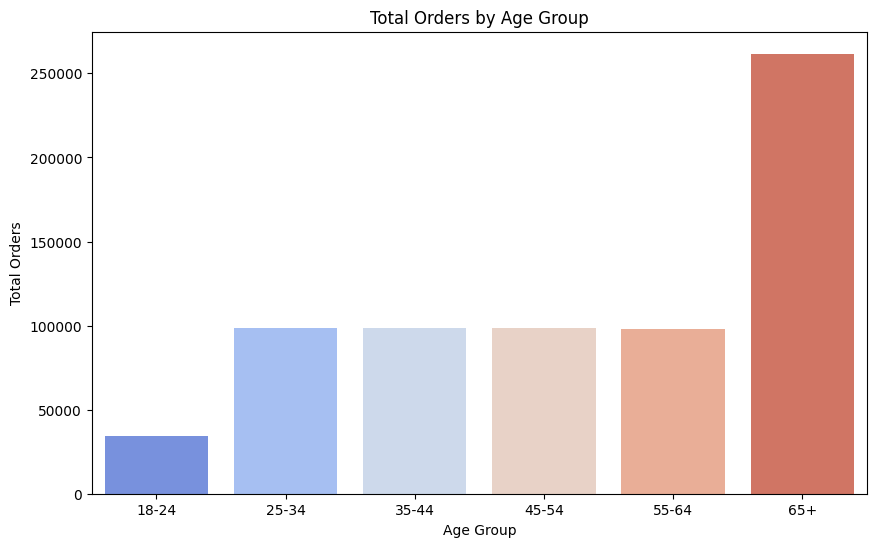

In [253]:
# Check the first few rows to confirm the new column
print(retail_data[['customer_age', 'age_group']].head())

# Analyze the data by age group 
age_group_summary = retail_data.groupby('age_group', observed=True).agg(
    total_sales=('sales', 'sum'),
    total_orders=('order_id', 'count')
).reset_index()

# Print the summarized statistics for each age group
print(age_group_summary)

# Visualize total sales per age group with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_summary, x='age_group', y='total_sales', hue='age_group', palette='plasma')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

# Analyzing total number of orders per age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_summary, x='age_group', y='total_orders', hue='age_group', palette='coolwarm')
plt.title('Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.show()

Insights:<br>

65+ leads in sales (6.1M) and orders (261,676), indicating strong demand for products focused on health and leisure.<br>
25-64 age groups show similar sales (~227-230M) and order volumes (~98,000), reflecting steady engagement across these demographics.<br>
18-24 has the lowest sales (79M) and orders (34,582), suggesting limited purchasing power.

Product Preferences by Customer Segment

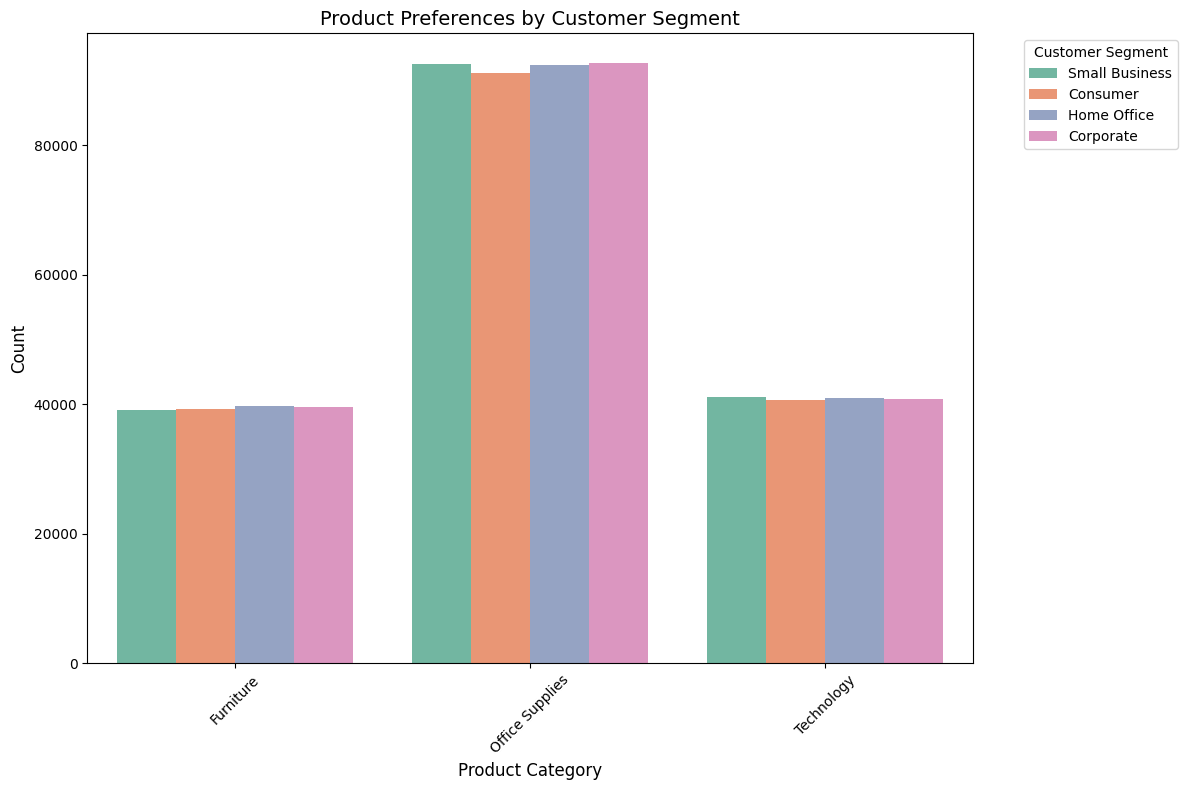

In [254]:
# Countplot for product category preferences by segment
plt.figure(figsize=(12, 8))
sns.countplot(data=retail_data, x='product_category', hue='customer_segment', palette='Set2')
plt.title('Product Preferences by Customer Segment', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights:<br>

Office Supplies Dominate: Office Supplies is the most purchased product category across all customer segments, reflecting consistently high demand.<br>
Balanced Demand for Furniture & Technology: Furniture and Technology show relatively even purchase counts across segments, with no standout preferences.<br>
Uniform Preferences Across Segments: Customer segments have similar product category preferences, indicating equal contribution to demand for all three categories.<br>

Sales by Customer Segment and Product Category

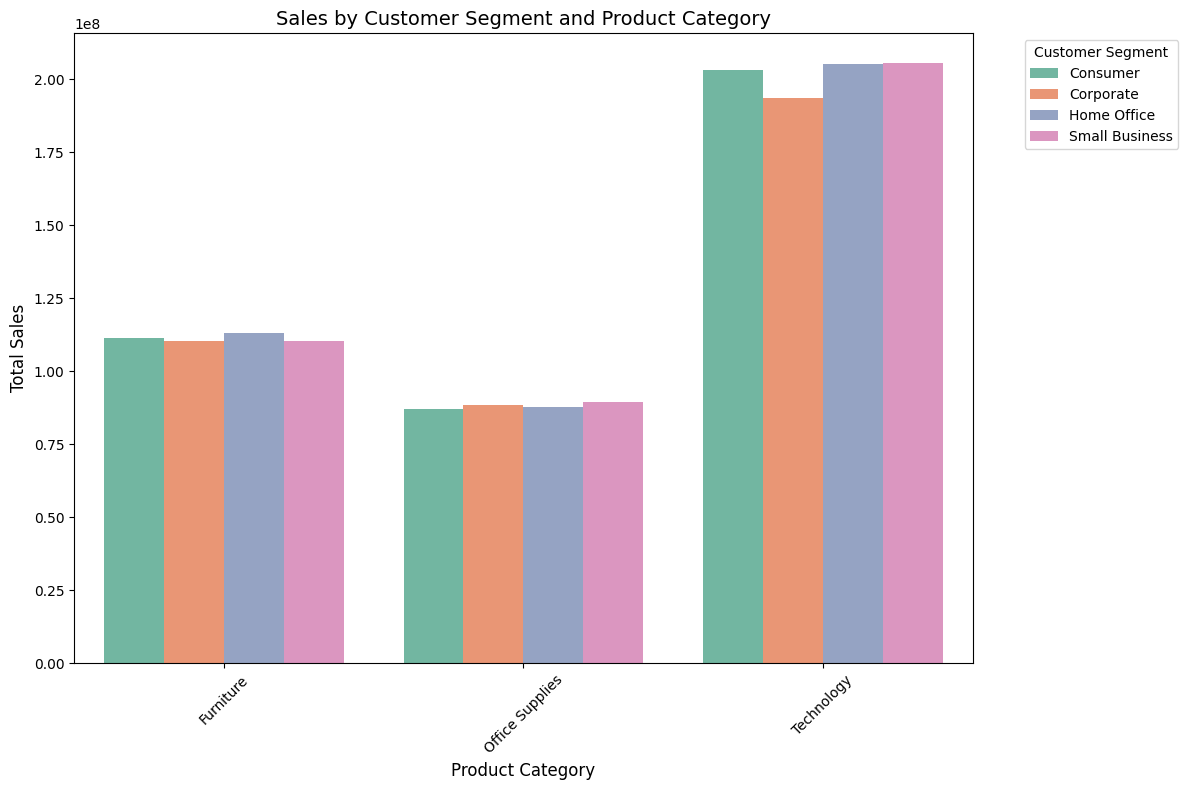

In [255]:
# Sales by Segment and Product Category
plt.figure(figsize=(12, 8))
sales_data = retail_data.groupby(['customer_segment', 'product_category'])['sales'].sum().reset_index()
sns.barplot(data=sales_data, x='product_category', y='sales', hue='customer_segment', palette='Set2')
plt.title('Sales by Customer Segment and Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights:<br>

Technology Leads Sales: The Technology category consistently shows the highest sales across all segments, demonstrating strong and uniform demand.<br>
Moderate Demand for Furniture and Office Supplies: Sales for Furniture are slightly higher than Office Supplies across all segments, but both categories lag significantly behind Technology.<br>
Uniform Sales Patterns: Customer segments display similar sales patterns across all categories, with no major deviations.

Profit by Customer Segment and Product Category

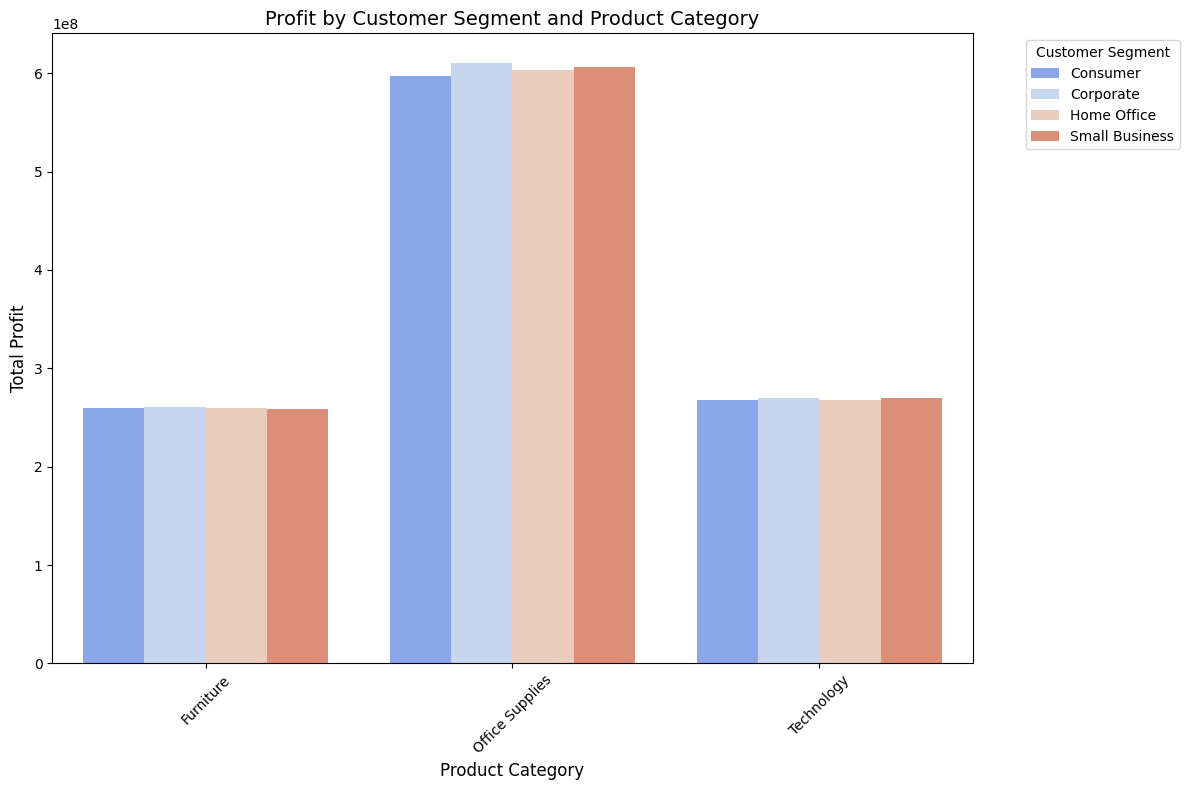

In [256]:
# Profit by Segment and Product Category
plt.figure(figsize=(12, 8))
profit_data = retail_data.groupby(['customer_segment', 'product_category'])['profit'].sum().reset_index()
sns.barplot(data=profit_data, x='product_category', y='profit', hue='customer_segment', palette='coolwarm')
plt.title('Profit by Customer Segment and Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights:<br>

Office Supplies generates the highest profit, especially in Home Office and Corporate segments.<br>
Furniture shows moderate profits, with Consumer and Small Business segments contributing similarly.<br>
Technology has lower profits across all segments, indicating potential issues with pricing or demand.

Top 5 Sales per State in Each Region

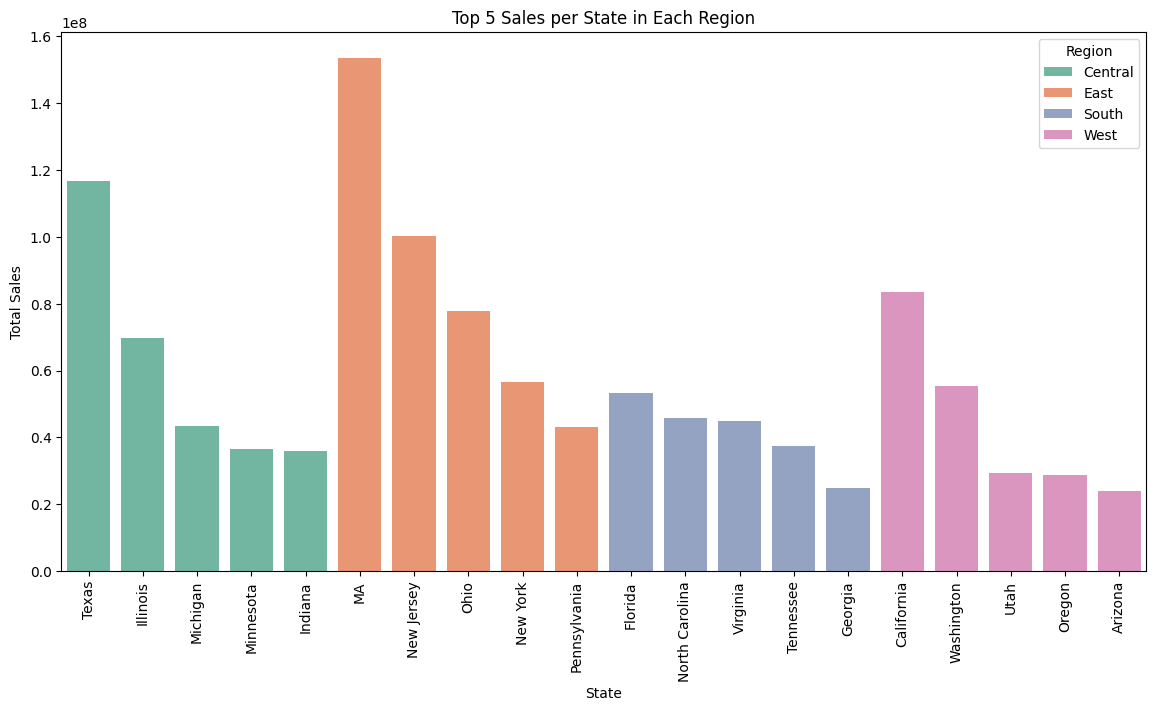

In [257]:
# Group by region and state, and calculate total sales
total_sales_per_region_state = retail_data.groupby(['region', 'state'])['sales'].sum().reset_index()

# For each region, get the top 5 states with the highest sales
top_5_sales_per_region = total_sales_per_region_state.groupby('region').apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)

# Create a bar plot for the top 5 states from each region
plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='sales', hue='region', data=top_5_sales_per_region, palette='Set2')
plt.title('Top 5 Sales per State in Each Region')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.show()

Insight<br>

Texas and California are the top-performing states in the Central and West regions, respectively, contributing significantly to total sales.<br>
Massachusetts leads the East region, with sales surpassing other states in this region.<br>
The South region shows a more balanced distribution of sales across states like Florida and North Carolina.<br>
The West region exhibits a steep drop after California, indicating a concentration of sales in one state.

Product Base Margin by Product Category

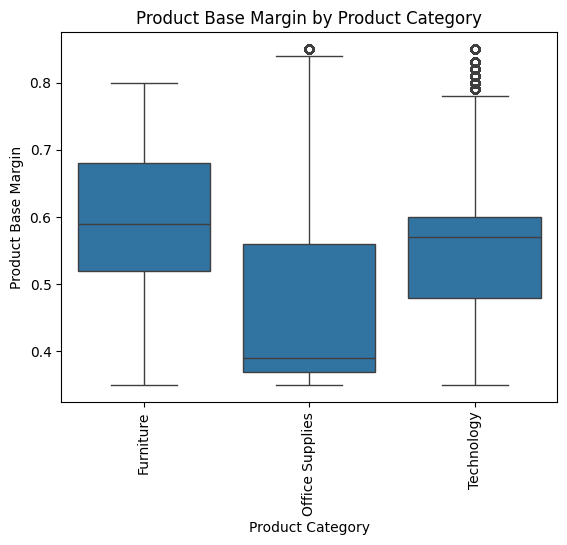

In [258]:
sns.boxplot(x='product_category', y='product_base_margin', data=retail_data)
plt.title('Product Base Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Product Base Margin')
plt.xticks(rotation=90)
plt.show()

Insights <br>

Furniture:<br>
Median Product Base Margin: The Furniture category shows a higher median product base margin compared to other categories.<br>
Spread: The margins for Furniture are spread relatively evenly, with no outliers, indicating consistent profitability.<br>

Office Supplies:<br>
Median Product Base Margin: The Office Supplies category has the lowest median margin.<br>
Outliers: A few outliers exist on the higher end, which could represent highly profitable office supply products.<br>
Spread: This category has a wide range of margins, suggesting varying profitability across products.<br>

Technology:<br>
Median Product Base Margin: Margins for Technology are comparable to Furniture but slightly lower.<br>
Outliers: Several outliers exist on the high end, indicating the presence of highly profitable products.<br>
Spread: The data has less variability compared to Office Supplies but is less consistent than Furniture.

Monthly Sales Trend

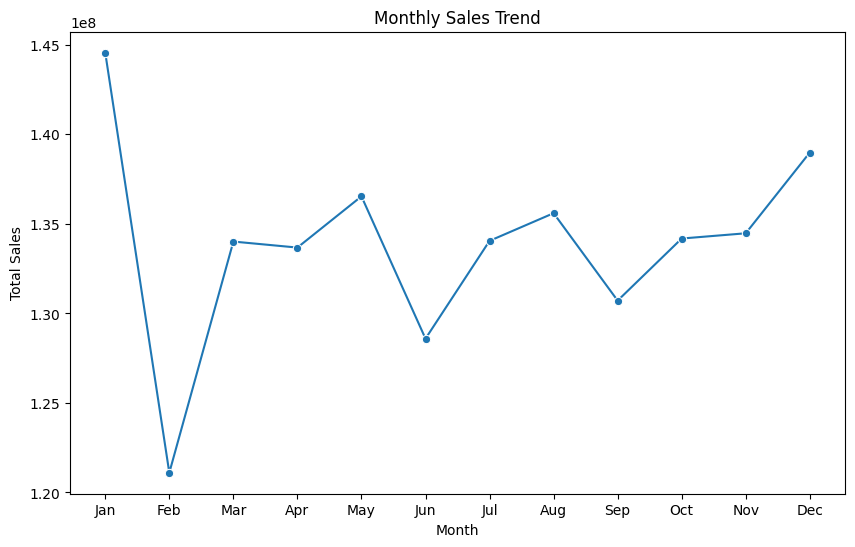

In [259]:
# Plot Monthly Sales Trend
retail_data['order_month'] = retail_data['order_date'].dt.month
monthly_sales = retail_data.groupby('order_month')['sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='order_month', y='sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Insights:<br>

Seasonal Peaks: High sales in January and December, likely due to holidays and promotions.<br>
Sales Dips: Significant drop in February and low sales in June and September.<br>
Year-End Growth: Strong upward trend in November and December indicates effective holiday demand.

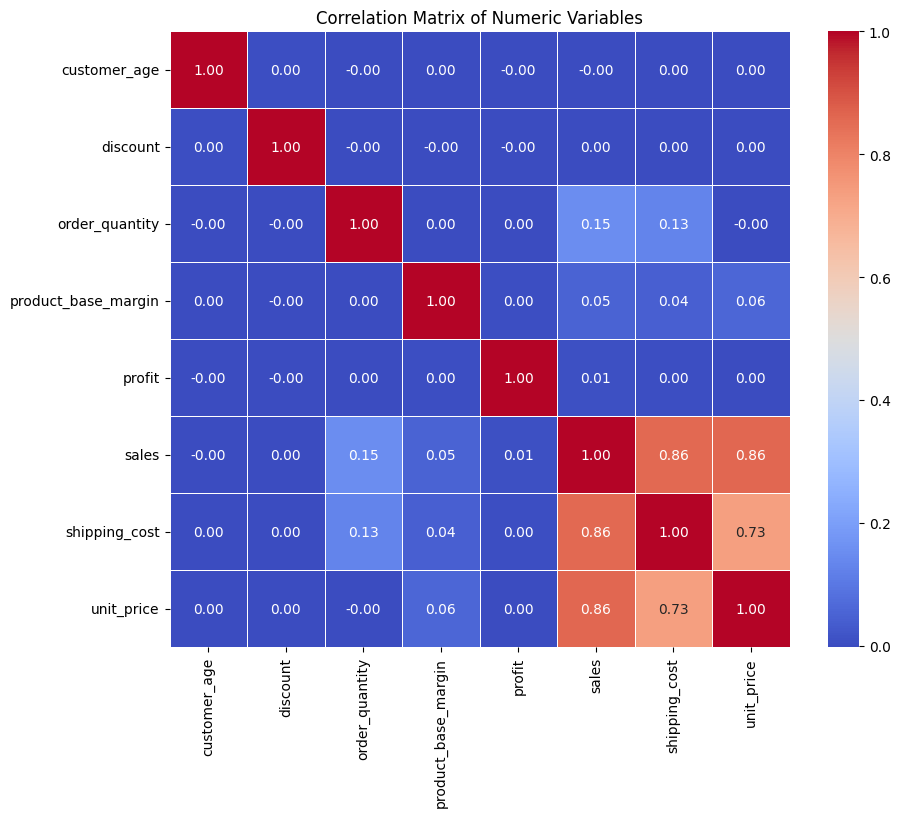

In [260]:
# Select numeric columns for correlation matrix
numeric_columns = ['customer_age', 'discount', 'order_quantity', 'product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price']
numeric_data = retail_data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


Key Insights:<br>
Strong Correlations:
Sales and Shipping Cost (0.86): Higher sales are linked with higher shipping costs.
Sales and Unit Price (0.86): Expensive products contribute more to sales.
Shipping Cost and Unit Price (0.73): Larger, pricier items have higher shipping costs.<br>

Moderate Correlations:
Order Quantity and Sales (0.15): More orders slightly boost sales.
Order Quantity and Shipping Cost (0.13): More orders lead to higher shipping costs.<br>

Weak or No Correlation:
Profit shows weak correlation with other variables.

***Customer Segmentation Based on Spending and Frequency Patterns***

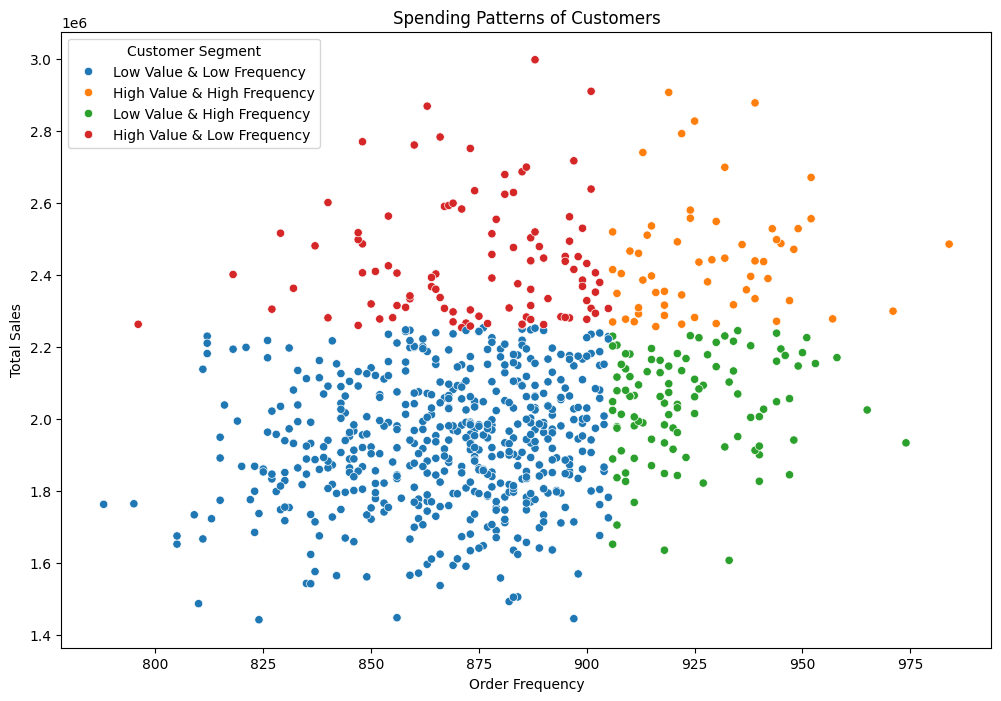

In [261]:
# Aggregate sales and frequency
customer_spending = retail_data.groupby('customer_name').agg({
    'sales': 'sum',  # Total spending
    'order_id': 'count'  # Number of orders
}).reset_index()

# Rename columns
customer_spending.rename(columns={'sales': 'total_sales', 'order_id': 'order_frequency'}, inplace=True)

# Add a rank for high-value customers (top 20% by sales)
customer_spending['high_value'] = customer_spending['total_sales'] >= customer_spending['total_sales'].quantile(0.8)

# Add a rank for frequent buyers (top 20% by order frequency)
customer_spending['frequent_buyer'] = customer_spending['order_frequency'] >= customer_spending['order_frequency'].quantile(0.8)

# Combine segments
customer_spending['customer_segment'] = customer_spending.apply(
    lambda row: 'High Value & High Frequency' if row['high_value'] and row['frequent_buyer'] else
                'High Value & Low Frequency' if row['high_value'] else
                'Low Value & High Frequency' if row['frequent_buyer'] else
                'Low Value & Low Frequency',
    axis=1
)

# Scatter plot for spending vs. frequency
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=customer_spending,
    x='order_frequency', y='total_sales', hue='customer_segment',
    palette='tab10'
)
plt.title('Spending Patterns of Customers')
plt.xlabel('Order Frequency')
plt.ylabel('Total Sales')
plt.legend(title='Customer Segment')
plt.show()


Insights:<br>

Blue (Low Value & Low Frequency): Low sales and infrequent orders. Risk of churn.<br>
Orange (High Value & High Frequency): High sales and frequent orders. Ideal, loyal customers.<br>
Red (High Value & Low Frequency): High sales but infrequent purchases. Potential for more engagement.<br>
Green (Low Value & High Frequency): Frequent orders, but low total sales. Potential to increase order value.

***Segment customers based on their purchase history***

           TotalSales                Frequency        TotalQuantity         
                 mean       median        mean median          mean   median
Cluster                                                                     
0        1.952359e+06  1953835.480  882.525223  882.0  22491.175074  22418.0
1        2.295009e+06  2270091.865  914.160550  913.5  23366.743119  23286.5
2        1.957275e+06  1932345.020  844.000000  846.0  21426.358079  21481.0


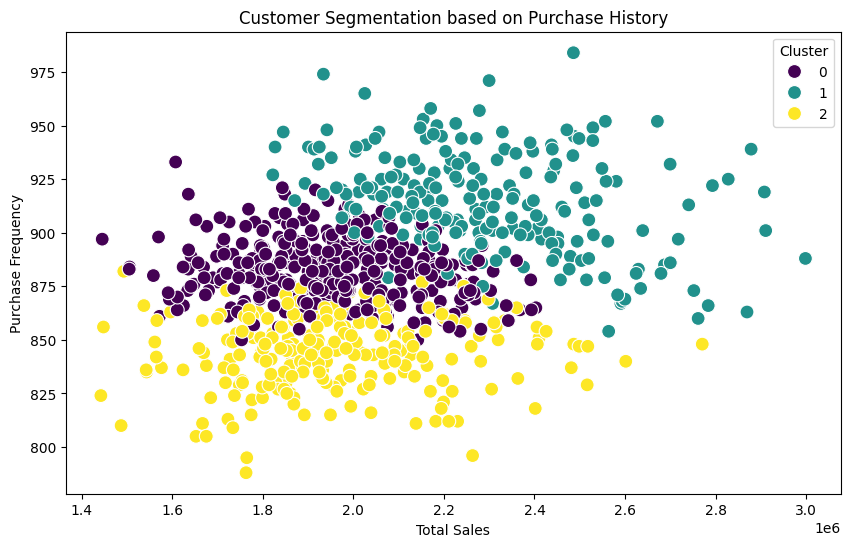

In [262]:
# Calculate RFM values for each customer
customer_data = retail_data.groupby('customer_name').agg({
    'sales': 'sum',            
    'order_id': 'nunique',    
    'order_quantity': 'sum'    
})

#  Rename columns for clarity
customer_data.rename(columns={
    'sales': 'TotalSales',
    'order_id': 'Frequency',
    'order_quantity': 'TotalQuantity'
}, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init set for stability
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze and visualize clusters
cluster_summary = customer_data.groupby('Cluster').agg(['mean', 'median'])
print(cluster_summary)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSales', y='Frequency', hue='Cluster', data=customer_data, palette='viridis', s=100)
plt.xlabel('Total Sales')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segmentation based on Purchase History')
plt.legend(title='Cluster')
plt.show()


Insight:<br>
Cluster 0:Customers in this cluster have moderate sales and purchase frequency.<br>
Cluster 1:These customers are the highest contributors in both sales and purchase frequency, showing high engagement.<br>
Cluster 2:These customers contribute a similar sales value to Cluster 0 but purchase less frequently.

***Monthly Sales Trend for Top 5 Products***

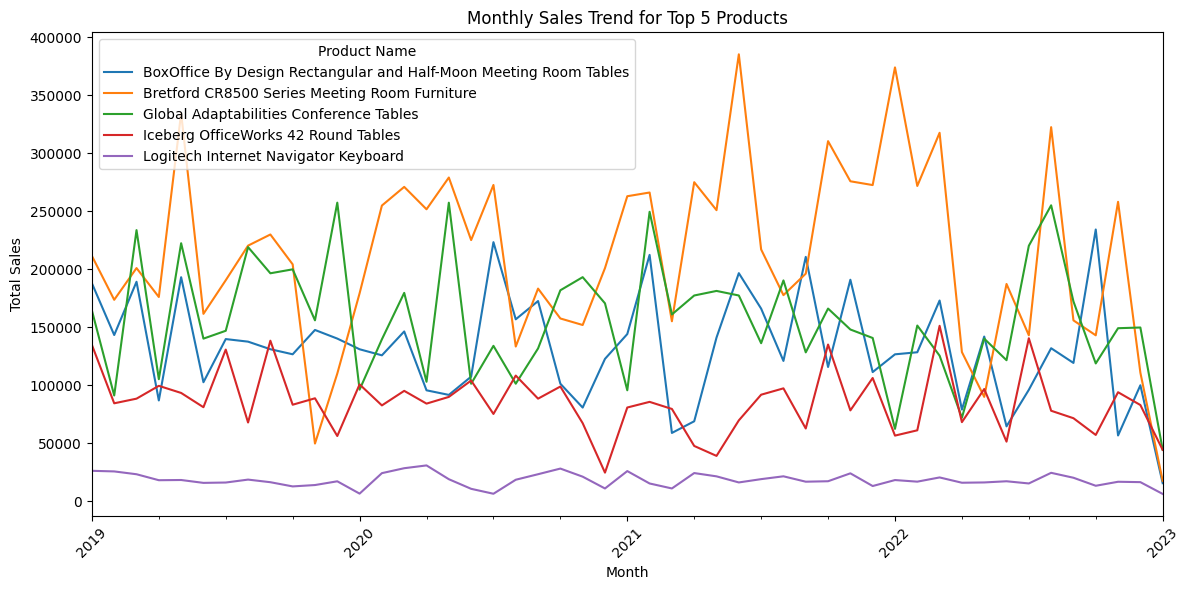

In [263]:
# Identify top 5 products by quantity sold
top_5_products = retail_data.groupby('product_name')['order_quantity'].sum().nlargest(5).index.tolist()

# Filter data for the top 5 products
top_5_product_data = retail_data[retail_data['product_name'].isin(top_5_products)].copy()

# Extract month and year for aggregation
top_5_product_data['order_month'] = top_5_product_data['order_date'].dt.to_period('M')

# Group by month and product for monthly sales
monthly_sales_trend = top_5_product_data.groupby(['order_month', 'product_name'])['sales'].sum().unstack(fill_value=0)

# Plot the trend
monthly_sales_trend.index = monthly_sales_trend.index.to_timestamp()  # Convert Period to Timestamp
monthly_sales_trend.plot(figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend for Top 5 Products')
plt.legend(title='Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:<br>

Top Performers: "Bretford CR8500 Series" and "BoxOffice Meeting Tables" lead in sales with seasonal peaks.<br>
Low Performer: "Logitech Internet Navigator Keyboard" shows consistently low sales.<br>
Volatility: Sales trends are highly fluctuating, influenced by external factors like promotions.

***Customer Segmentation using RFM***

Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

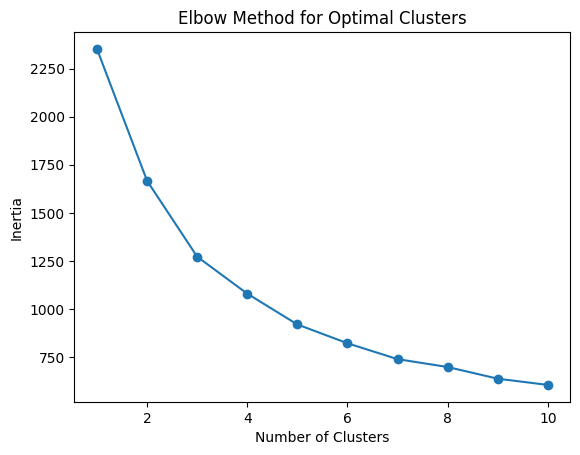

In [264]:
# Calculate RFM values
latest_date = retail_data['order_date'].max()
rfm_data = retail_data.groupby('customer_name').agg({
    'order_date': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                # Frequency
    'sales': 'sum'                                        # Monetary
}).rename(columns={'order_date': 'Recency', 'order_id': 'Frequency', 'sales': 'Monetary'})

# Initialize a StandardScaler to normalize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

From the 'elbow' method, it is identified that the optimal number of clusters is 4.

          Recency          Frequency             Monetary            
             mean median        mean median          mean      median
Cluster                                                              
0        4.534884    4.0  877.790698  878.0  1.977023e+06  1972082.18
1        1.037736    1.0  907.400943  904.0  2.003419e+06  2014330.83
2        1.148810    1.0  892.702381  887.5  2.415418e+06  2386206.76
3        1.229091    1.0  852.349091  856.0  1.894261e+06  1889776.60


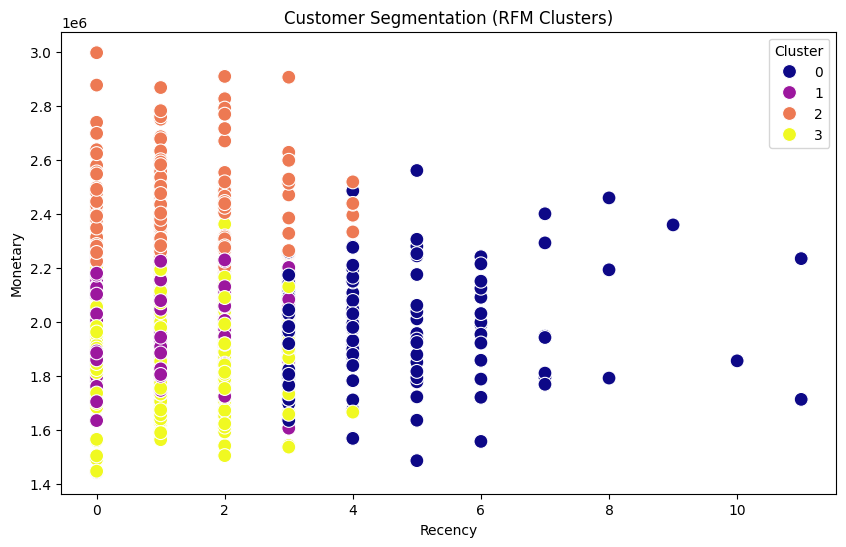

In [265]:
# Apply KMeans clustering with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Assign cluster labels to customers
rfm_data['Cluster'] = kmeans.labels_

# Analyze the clusters
print(rfm_data.groupby('Cluster').agg(['mean', 'median']))

# Visualize the clusters using Seaborn scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_data, palette='plasma', s=100)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation (RFM Clusters)')
plt.legend(title='Cluster')
plt.show()

This scatter plot visualizes customer segmentation based on RFM (Recency, Frequency, Monetary) analysis, using clustering. Each point represents a customer, with the x-axis as Recency (time since last purchase), the y-axis as Monetary (spending), and the colors indicating distinct clusters.<br>

Insights<br>

Cluster 0:Customers are somewhat active with a moderate amount of sales. They have the highest mean recency, indicating they made purchases recently.<br>
Cluster 1 : Customers have a very recent recency and high frequency of purchases, contributing the second-highest monetary value.<br>
Cluster 2 : It represents the highest monetary value, though the frequency is slightly lower than Cluster 1. They are highly engaged and have a very recent purchase behavior.<br>
Cluster 3: It is slightly less active than other clusters in terms of frequency and sales but still contributes moderately in both.

For evaluating the quality of clustering, we calculated the silhouette score for our selected 'k' value.

In [266]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2574266544310312


To check for the 'k' having maximum silhouette score, we plot various values for k with its  score.

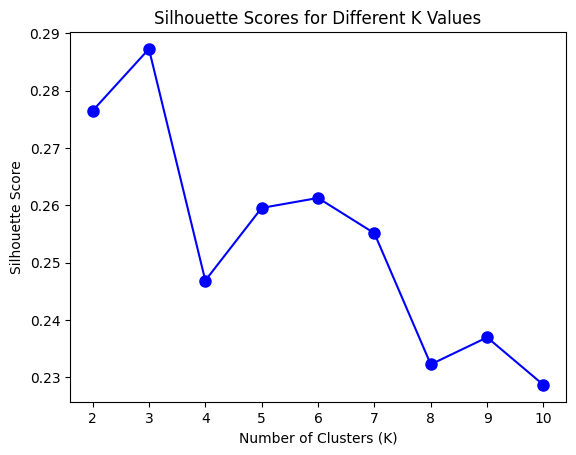

In [267]:
# Initialize a list to hold silhouette scores for different numbers of clusters
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores against the number of clusters
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K Values')
plt.show()

From the above plot, we identified the number of clusters(k) that achieves the maximum silhouette score as 3.

***Advanced EDA Techniques***

***Pareto Analysis (80/20 Rule)***
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

1. Top 20% Products Contributing to 80% Revenue

In [268]:
# Calculate revenue for each product
product_revenue = retail_data.groupby('product_name')['sales'].sum().sort_values(ascending=False)

# Calculate cumulative revenue and percentage
cumulative_revenue = product_revenue.cumsum()
total_revenue = product_revenue.sum()
product_revenue_percent = cumulative_revenue / total_revenue

# Identify the 20% products contributing to 80% revenue
top_products = product_revenue_percent[product_revenue_percent <= 0.8]
print(f"Top products contributing to 80% revenue:\n{top_products}")

Top products contributing to 80% revenue:
product_name
Polycom ViewStation ISDN Videoconferencing Unit             0.057654
Okidata Pacemark 4410N Wide Format Dot Matrix Printer       0.086728
Canon imageCLASS 2200 Advanced Copier                       0.114989
Epson DFX-8500 Dot Matrix Printer                           0.136691
Lexmark 4227 Plus Dot Matrix Printer                        0.154696
                                                              ...   
Luxo Professional Combination Clamp-On Lamps                0.796211
T18                                                         0.797119
AT&T 2230 Dual Handset Phone With Caller ID/Call Waiting    0.798028
Multicolor Computer Printout Paper                          0.798932
Bush Westfield Collection Bookcases  Fully Assembled        0.799829
Name: sales, Length: 275, dtype: float64


2. Top 20% Customers Contributing to 80% Sales

In [269]:
# Calculate total sales for each customer
customer_sales = retail_data.groupby('customer_name')['sales'].sum().sort_values(ascending=False)

# Calculate cumulative sales and percentage
cumulative_sales = customer_sales.cumsum()
total_sales = customer_sales.sum()
customer_sales_percent = cumulative_sales / total_sales

# Identify the 20% customers contributing to 80% sales
top_customers = customer_sales_percent[customer_sales_percent <= 0.8]
print(f"Top customers contributing to 80% sales:\n{top_customers}")


Top customers contributing to 80% sales:
customer_name
evan bailliet         0.001866
michael moore         0.003678
lindsay williams      0.005488
chuck magee           0.007280
alan barnes           0.009066
                        ...   
victor price          0.795302
dorothy dickinson     0.796457
corinna mitchell      0.797612
ivan liston           0.798766
adam shillingsburg    0.799921
Name: sales, Length: 599, dtype: float64


***Anomaly Detection in Sales Data***

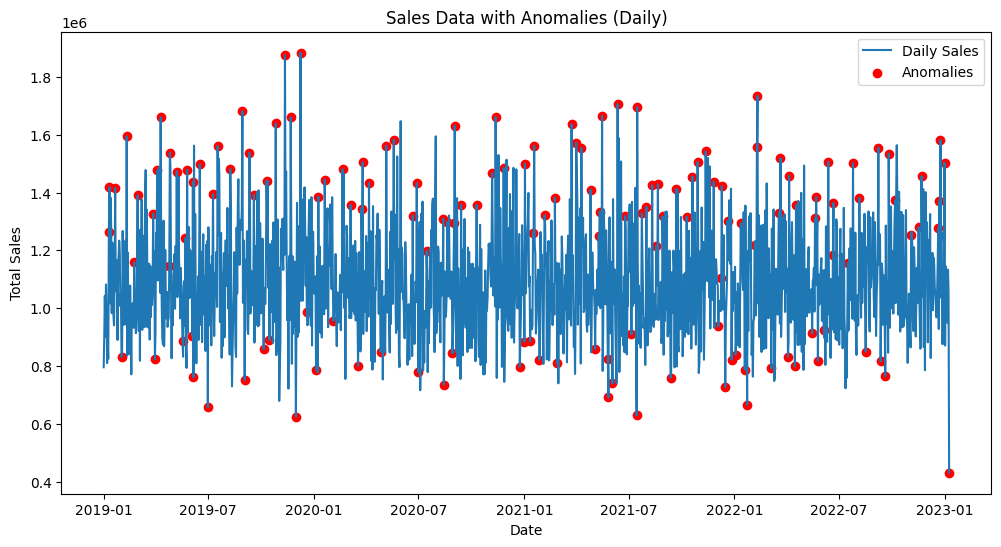

Number of anomalies detected: 150


In [270]:
# Convert 'order_date' to datetime format
retail_data['order_date'] = pd.to_datetime(retail_data['order_date'])
retail_data['order_date_column'] = retail_data['order_date']

# Set 'order_date' as the index
retail_data.set_index('order_date', inplace=True)

# Use the 'sales' column directly for total sales
daily_sales = retail_data['sales'].resample('D').sum()  # Summing 'sales' for each day

# Calculate rolling mean and standard deviation of sales over a 7-day window
daily_sales_rolling_mean = daily_sales.rolling(window=7).mean()
daily_sales_rolling_std = daily_sales.rolling(window=7).std()

# Define threshold for anomaly detection (e.g., 2.25 standard deviations)
threshold = 1.5

# Identify anomalies based on the rolling mean and standard deviation
anomalies = daily_sales[
    (daily_sales > daily_sales_rolling_mean + threshold * daily_sales_rolling_std) |
    (daily_sales < daily_sales_rolling_mean - threshold * daily_sales_rolling_std)
]

# Plotting the sales data and anomalies
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Daily Sales')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Data with Anomalies (Daily)')
plt.legend()
plt.show()

# Output the number of anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")

Insights<br>

Sales Fluctuations: The sales data shows frequent ups and downs, with noticeable peaks and dips at various times.<br>

Potential Reasons for Anomalies:<br>
Sales Spikes: Likely linked to special events, promotions, or high-demand product launches (e.g., holiday sales or product releases).<br>
Sales Drops: Could be due to issues like product shortages, pricing errors, or delivery problems.

Feature Engineering

In [271]:
# Create a copy of the original DataFrame
df = retail_data.copy()

# Feature engineering: Extracting temporal features from `order_date`
df['Year'] = df['order_date_column'].dt.year
df['Month'] = df['order_date_column'].dt.month
df['Day'] = df['order_date_column'].dt.day
df['Hour'] = df['order_date_column'].dt.hour
df['Weekday'] = df['order_date_column'].dt.weekday

In [272]:
# Define features and target variable
features = ['order_quantity', 'unit_price', 'Year', 'Month', 'Day', 'Hour', 'region']
target = 'sales'

# Select the relevant columns for modeling
data_for_model = df[features + [target]]

# One-hot encode the categorical feature (`region`)
data_for_model = pd.get_dummies(data_for_model, columns=['region'], dtype=int)

# Split data into features (X) and target (y)
X = data_for_model.drop(columns=[target])
y = data_for_model[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Adjust max_depth for tuning

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared for train data (R2): {r2_train:.2f}")
print(f"R-squared for test data (R2): {r2_test:.2f}")

Mean Absolute Error (MAE): 556.58
Root Mean Squared Error (RMSE): 1403.23
R-squared for train data (R2): 0.97
R-squared for test data (R2): 0.97


In [273]:
# Define features and target variable
features = ['order_quantity', 'unit_price', 'Year', 'Month', 'Day', 'Hour', 'region']
target = 'sales'

# Select the relevant columns for modeling
data_for_model = df[features + [target]]

# One-hot encode the categorical feature (`region`)
data_for_model = pd.get_dummies(data_for_model, columns=['region'], dtype=int)

# Split data into features (X) and target (y)
X = data_for_model.drop(columns=[target])
y = data_for_model[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared for train data (R2): {r2_train:.2f}")
print(f"R-squared for test data (R2): {r2:.2f}")

Mean Absolute Error (MAE): 2.18
Root Mean Squared Error (RMSE): 16.42
R-squared for train data (R2): 1.00
R-squared for test data (R2): 1.00


In [274]:
# Define features and target variable
features = ['order_quantity', 'unit_price', 'discount', 'product_category', 'product_base_margin', 
            'shipping_cost', 'order_priority', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'region']
target = 'sales'

# Select the relevant columns for modeling
data_for_model = df[features + [target]]

# One-hot encode the categorical feature 
data_for_model = pd.get_dummies(data_for_model, columns=['region', 'product_category', 'order_priority'], dtype=int)

# Split data into features (X) and target (y)
X = data_for_model.drop(columns=[target])
y = data_for_model[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)  

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared for train data (R2): {r2_train:.2f}")
print(f"R-squared for test data (R2): {r2_test:.2f}")

Mean Absolute Error (MAE): 607.20
Root Mean Squared Error (RMSE): 1737.60
R-squared for train data (R2): 0.96
R-squared for test data (R2): 0.96


In [275]:
# Define features and target variable
features = ['order_quantity', 'unit_price', 'discount', 'product_category', 'product_base_margin', 
            'shipping_cost', 'order_priority', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'region']
target = 'sales'

# Select the relevant columns for modeling
data_for_model = df[features + [target]]

# One-hot encode the categorical feature 
data_for_model = pd.get_dummies(data_for_model, columns=['region', 'product_category', 'order_priority'], dtype=int)

# Split data into features (X) and target (y)
X = data_for_model.drop(columns=[target])
y = data_for_model[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared for train data (R2): {r2_train:.2f}")
print(f"R-squared for test data (R2): {r2:.2f}")

Mean Absolute Error (MAE): 2.42
Root Mean Squared Error (RMSE): 46.43
R-squared for train data (R2): 1.00
R-squared for test data (R2): 1.00
